# 전처리 과정

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as spst
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!
from statsmodels.graphics.mosaicplot import mosaic   
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')   

In [3]:
import seaborn as sns
print(sns.__version__)

0.11.0


In [4]:
pip install seaborn==0.11.0

In [5]:
print(sns.__version__)

0.11.0


In [6]:
path = 'customer_data_.csv'

df = pd.read_csv( path , encoding = 'CP949')
df.head()

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,2,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80000,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,4,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80000,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,5,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60000,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,0,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110000,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,3,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120000,0,3,비방문,없음,대리점,947000,SUV,중


In [7]:
df['소득']

0                0
1        102887400
2         22159500
3         51562500
4         26820200
           ...    
11995     86451000
11996     25962000
11997            0
11998     26366000
11999            0
Name: 소득, Length: 12000, dtype: int64

In [8]:
df.columns

Index(['clust', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay',
       '갱신', '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

In [9]:
len(df.columns)

21

In [10]:
df.isna().sum()

clust                      0
AGE                        0
등록(계/피)                    0
고용상태                       0
성별                         0
Willingness to pay/Stay    0
갱신                         0
상품타입                       0
교육수준                       0
소득                         0
지역                         0
결혼여부                       0
월 납입액                      0
VOC                        0
타 상품 보유 현황                 0
온라인방문빈도                    0
갱신인센티브                     0
판매채널                       0
총지불금액                      0
자동차                        0
거주지사이즈                     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   clust                    12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

# 대분류로 연속적인 숫자형과 범주형 분류

In [12]:
drop_cols = ['소득','총지불금액','Willingness to pay/Stay']
df_bum = df.drop( columns = drop_cols , axis = 1 )

In [13]:
df_int = df[drop_cols]

In [14]:
df_int

,소득,총지불금액,Willingness to pay/Stay
0,0,631000,2.616381
1,102887400,54000,6.352530
2,22159500,362000,4.974354
3,51562500,1264000,13.480284
4,26820200,947000,9.776436
...,...,...,...
11995,86451000,245000,25.985100
11996,25962000,468000,3.441000
11997,0,977000,9.057600
11998,26366000,854000,8.347200


In [15]:
df_bum

,clust,AGE,등록(계/피),고용상태,성별,갱신,상품타입,교육수준,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,자동차,거주지사이즈
0,2,3,피보험자,무직,1,0,기본,대학졸업,도시근교,미혼,80000,0,1,자주방문,없음,자사영업,일반세단,소
1,4,1,계약자,고용,0,0,기본,고졸이하,시골,미혼,80000,1,4이상,비방문,포인트,인터넷,일반세단,중
2,5,2,계약자,휴직,0,0,기본,대학졸업,도시근교,기혼,60000,0,4이상,비방문,할인,자사영업,일반세단,중
3,0,5,계약자,고용,1,0,고급,고졸이하,도시근교,기혼,110000,0,2,비방문,할인,자사영업,컴팩트카,대
4,3,4,계약자,고용,0,0,기본,석사,도시근교,기혼,120000,0,3,비방문,없음,대리점,SUV,중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,1,계약자,고용,1,0,기본,대학졸업,도심,기혼,70000,0,2,비방문,설계사독려,인터넷,일반세단,중
11996,0,3,피보험자,고용,0,1,중급,대학졸업,도시근교,미혼,80000,0,1,자주방문,할인,자사영업,일반세단,중
11997,2,3,피보험자,무직,1,0,중급,대학졸업,도시근교,미혼,90000,3,2,자주방문,할인,자사영업,일반세단,중
11998,4,4,계약자,고용,1,0,중급,대학졸업,도시근교,기혼,100000,0,3,비방문,포인트,자사영업,일반세단,대


# 1. EDA 진행 : 숫자형이고 연속적인 컬럼

In [16]:
def eda_1_n ( var , data , bins = 50 ):
    print( data[[var]].describe().T )
    plt.figure(figsize = ( 12 , 8))
    plt.subplot( 2 , 1 , 1)
    sns.histplot( x = var , data = data , bins = bins , kde = True)
    plt.grid()

    plt.subplot( 2 , 1 , 2)
    sns.boxplot( x = var , data = data )
    plt.grid()
    plt.show()

      count         mean           std  min  25%         50%         75%  \
소득  12000.0  46417371.85  3.736221e+07  0.0  0.0  41862400.0  76641500.0   

            max  
소득  132020900.0  


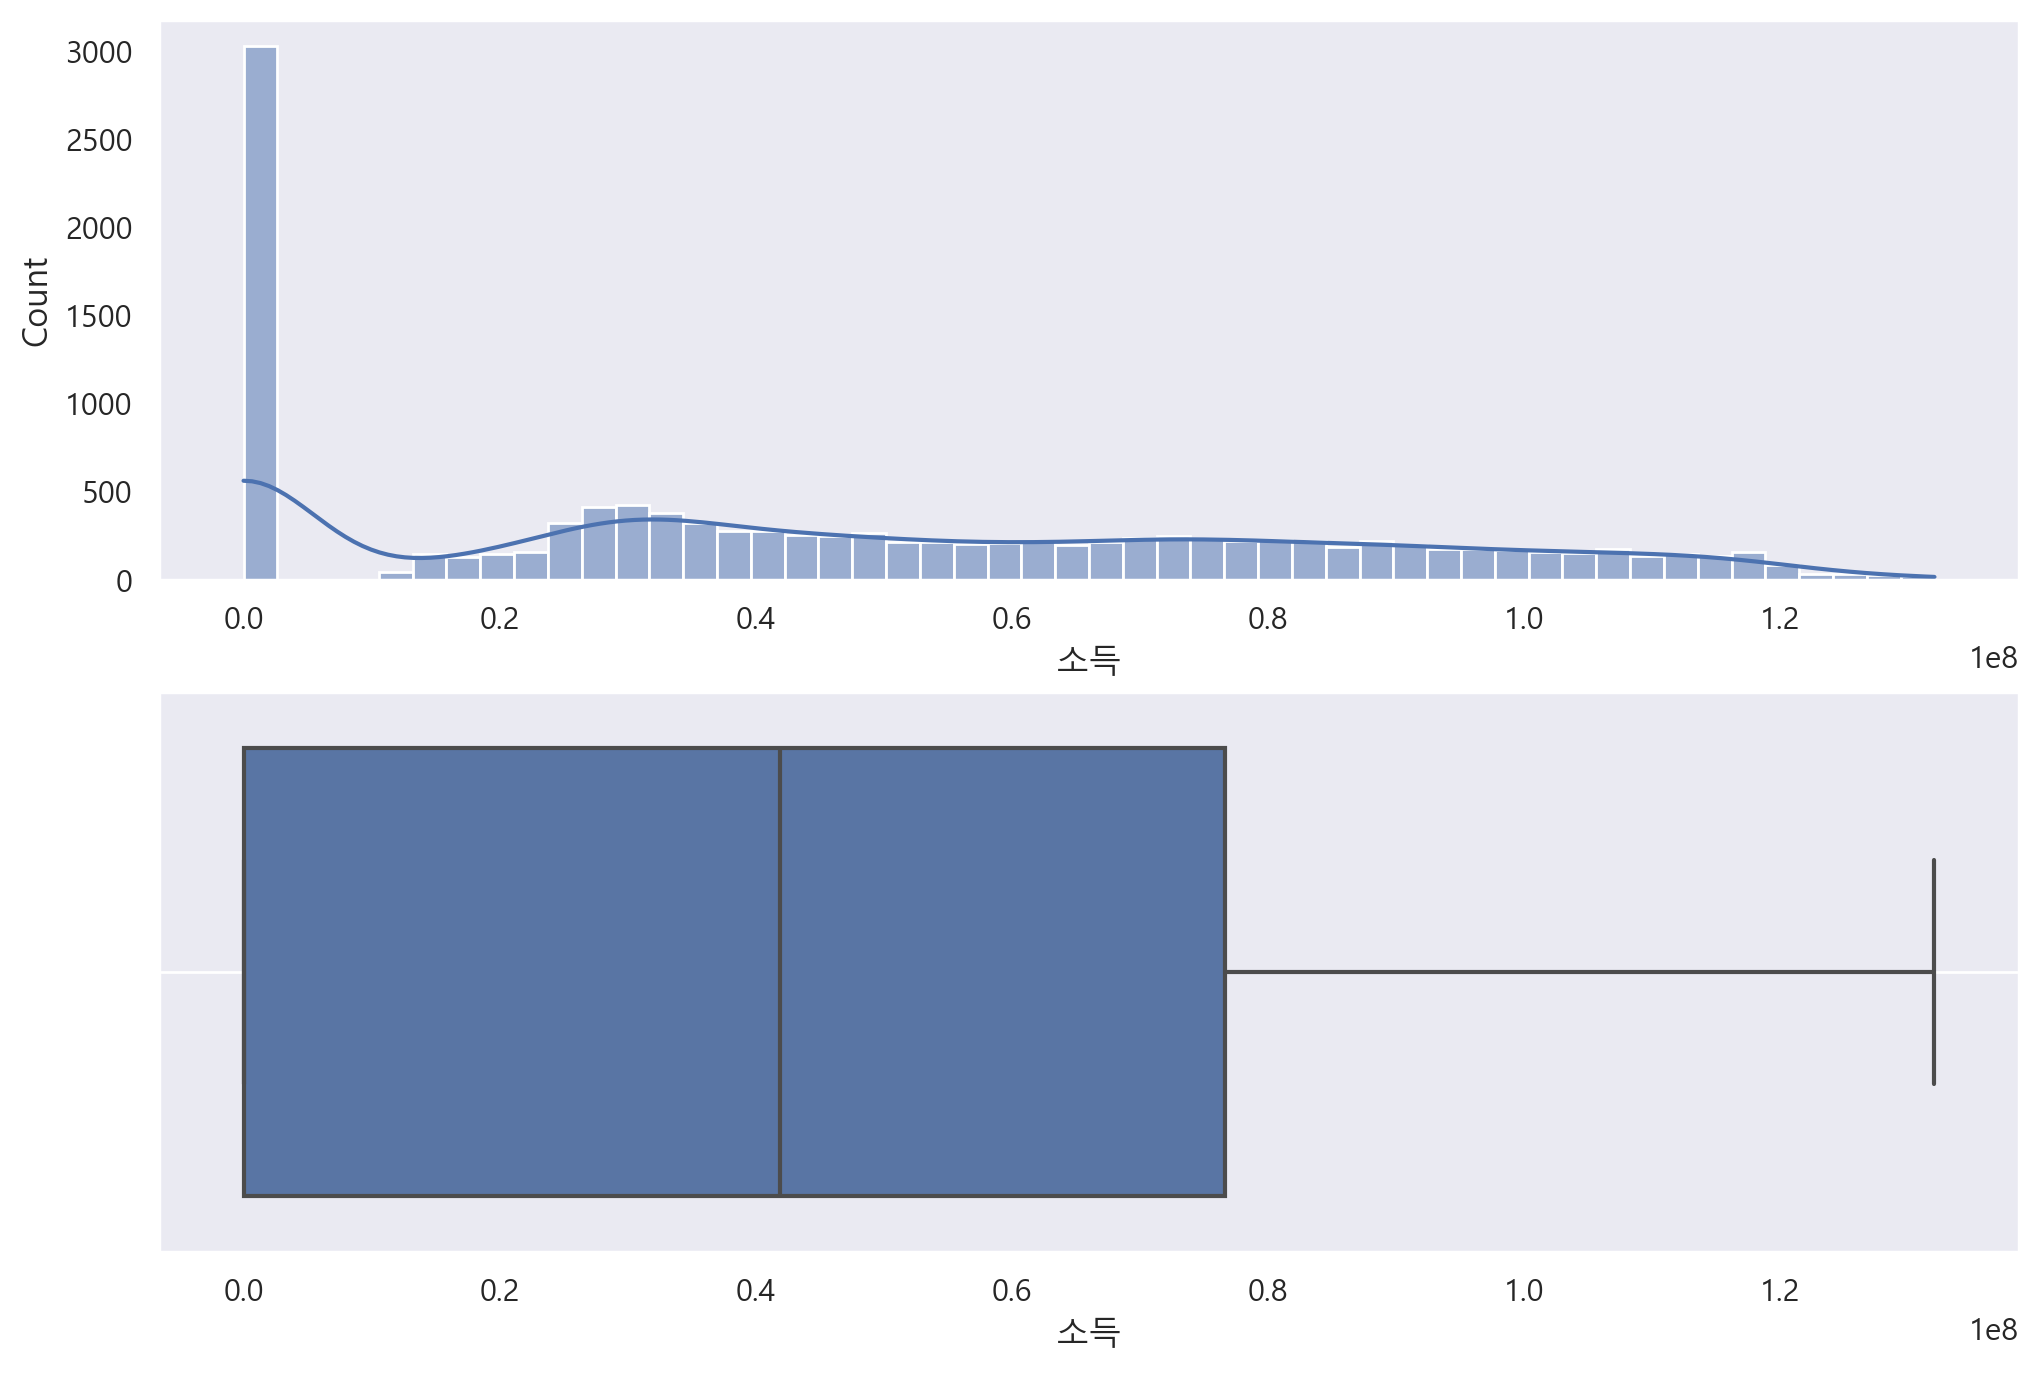

         count           mean            std  min       25%       50%  \
총지불금액  12000.0  535585.416667  358799.286205  0.0  336000.0  474000.0   

            75%        max  
총지불금액  679000.0  3573000.0  


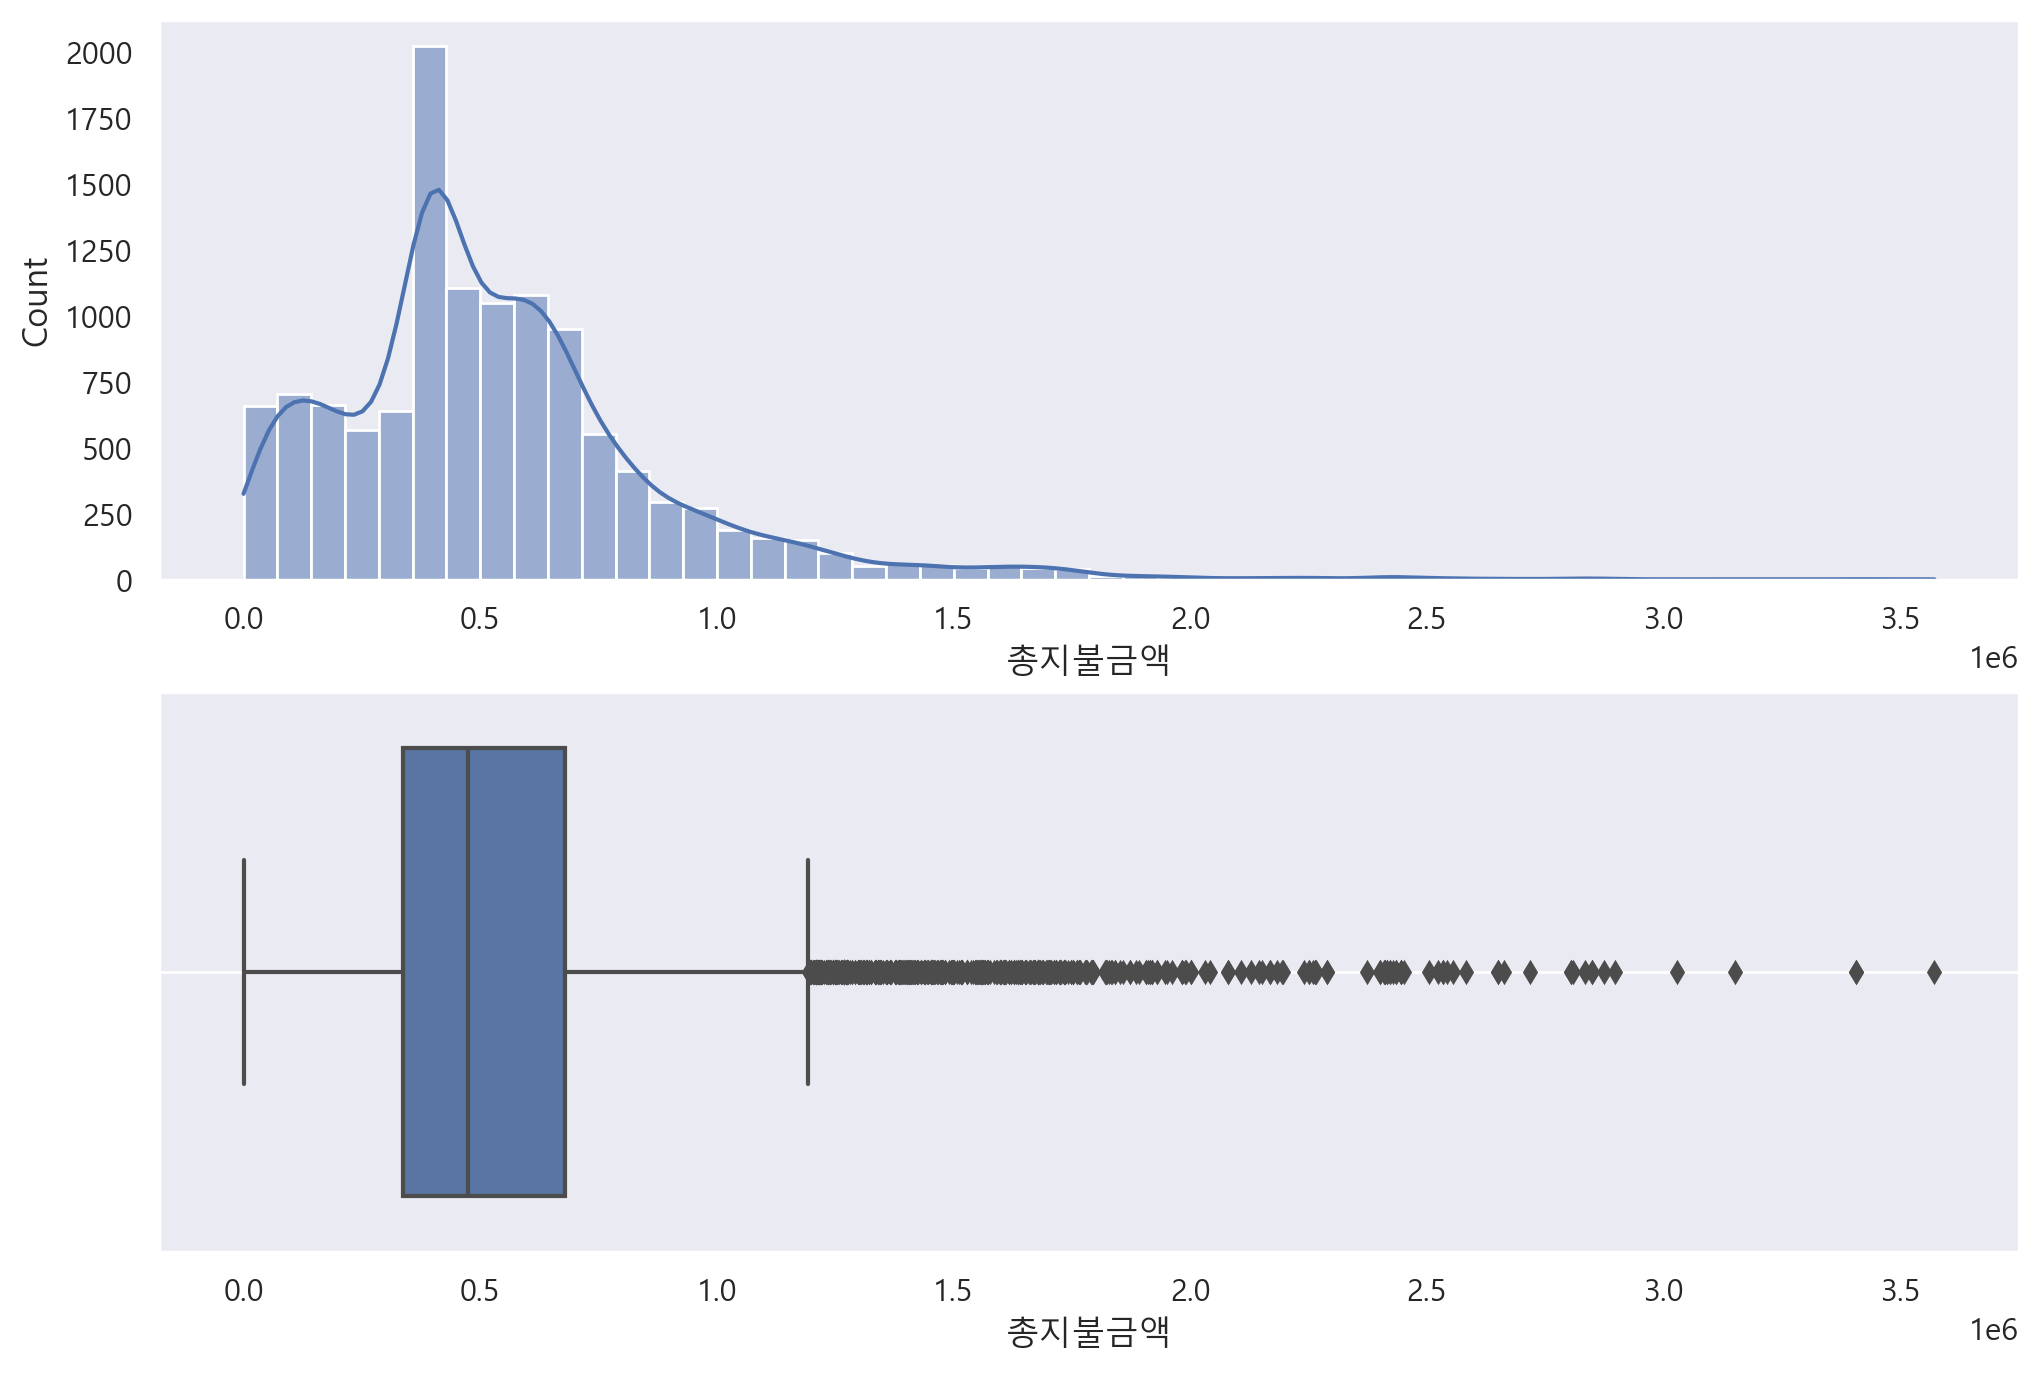

                           count      mean       std      min     25%  \
Willingness to pay/Stay  12000.0  8.859478  7.698885  2.04573  4.3734   

                              50%     75%      max  
Willingness to pay/Stay  6.384831  9.8679  92.4963  


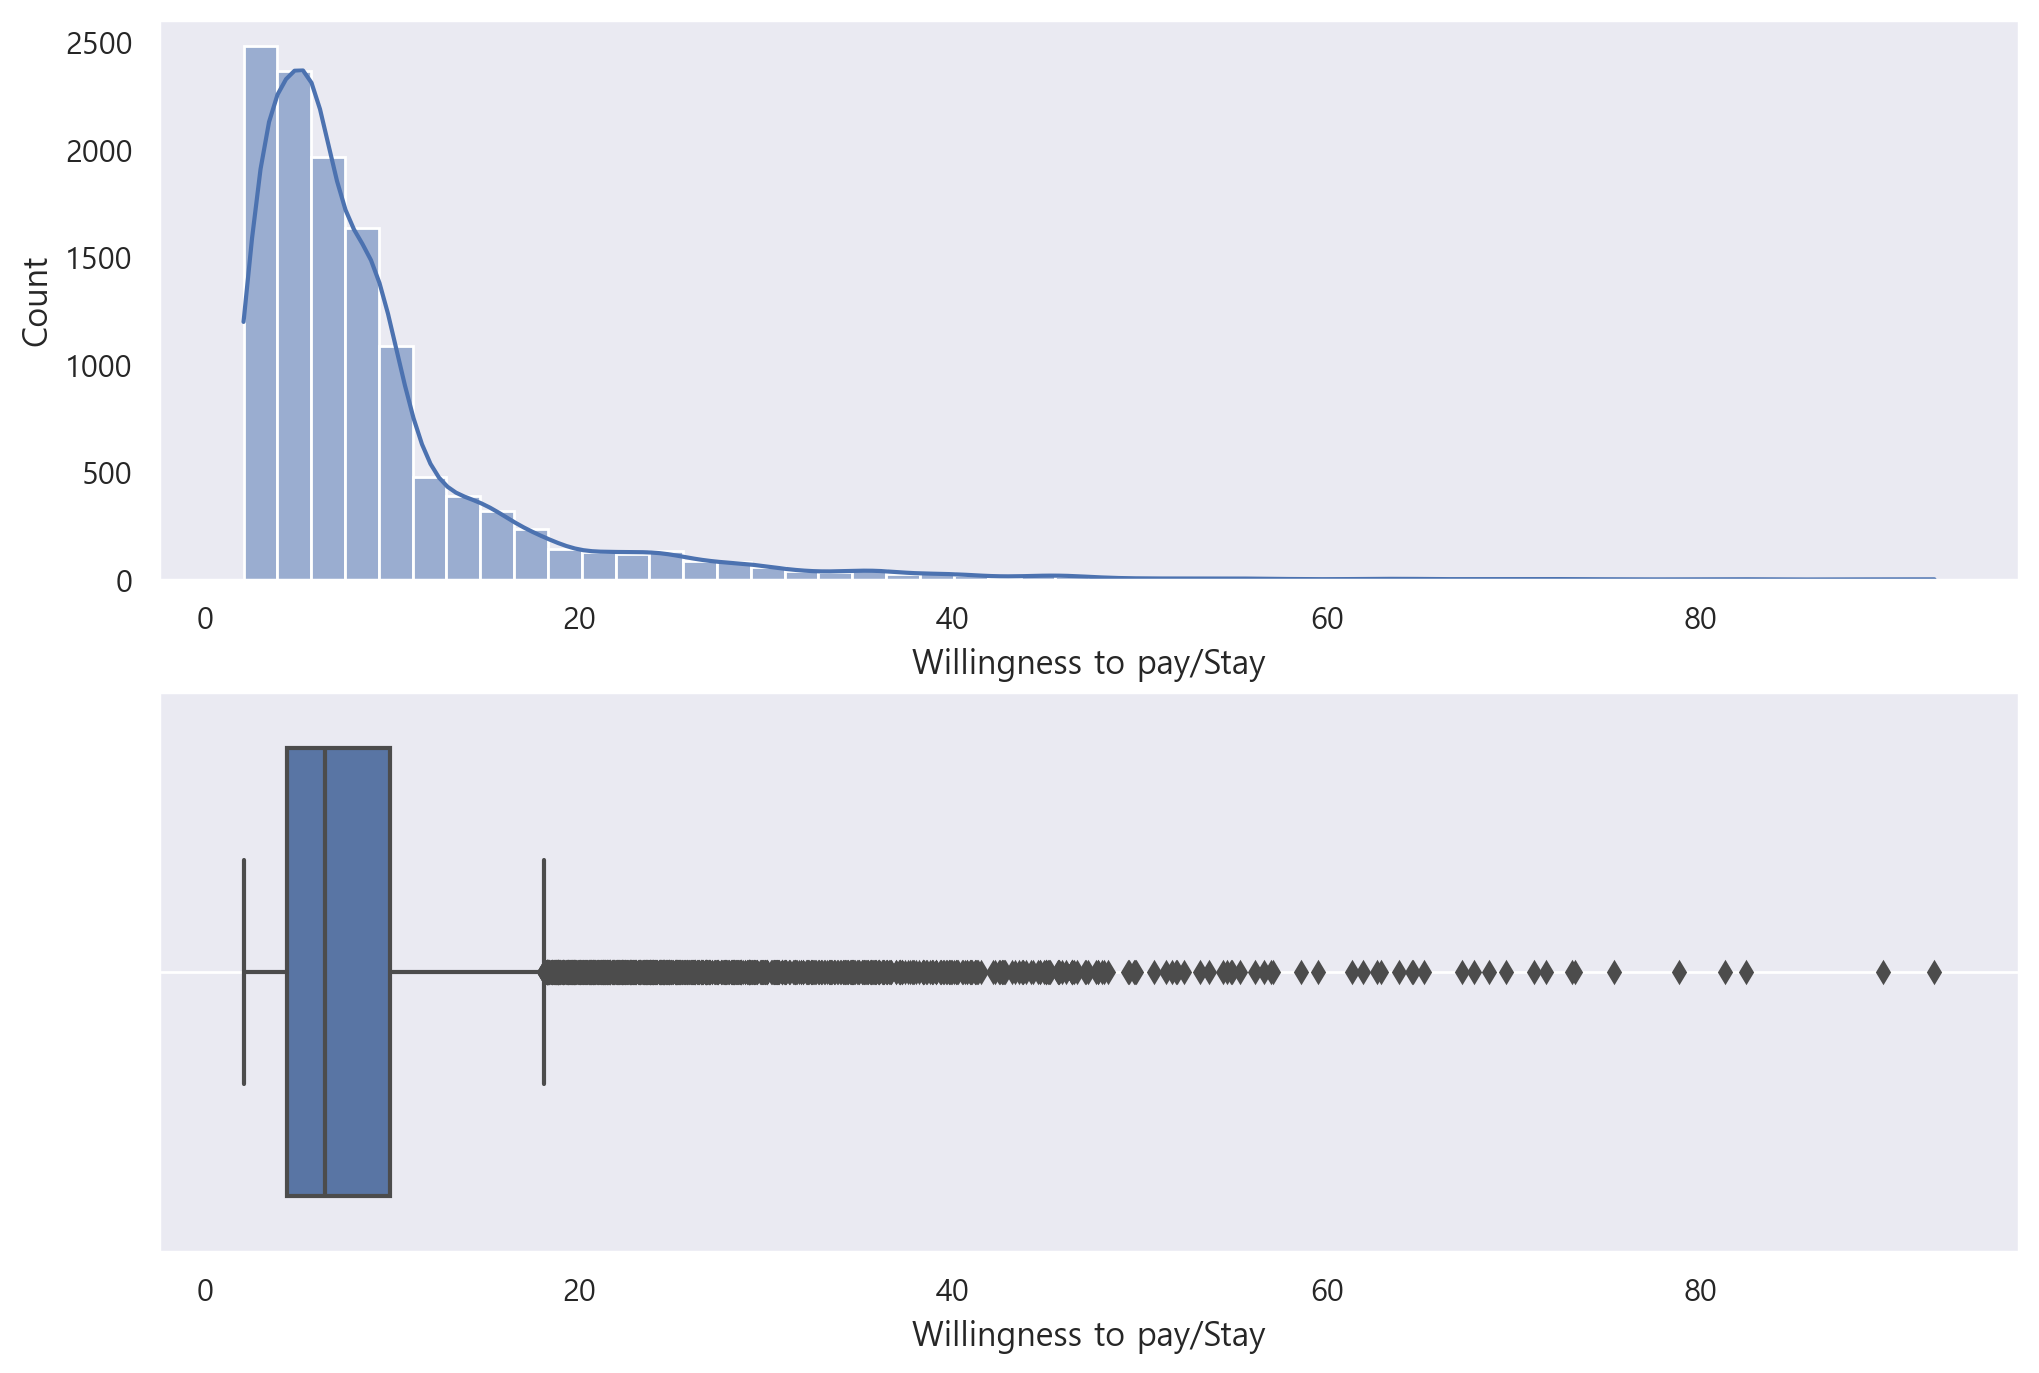

In [17]:
for i in df_int.columns:
    eda_1_n( i , df_int )

In [18]:
def eda_2_nn( a , b , data ):
    sns.scatterplot( x = a , y = b , data = data)
    sns.regplot( x = a , y = b , data = data)
    sns.jointplot( x = a , y = b , data = data)
    plt.grid()
    plt.show()
    result = spst.pearsonr( data[a] , data[b] )
    print( f'상관계수 : {result[0]} , P-value : {result[1]}')

: 소득 vs 총지불금액
----------------------------------------------------------------------------------------------------


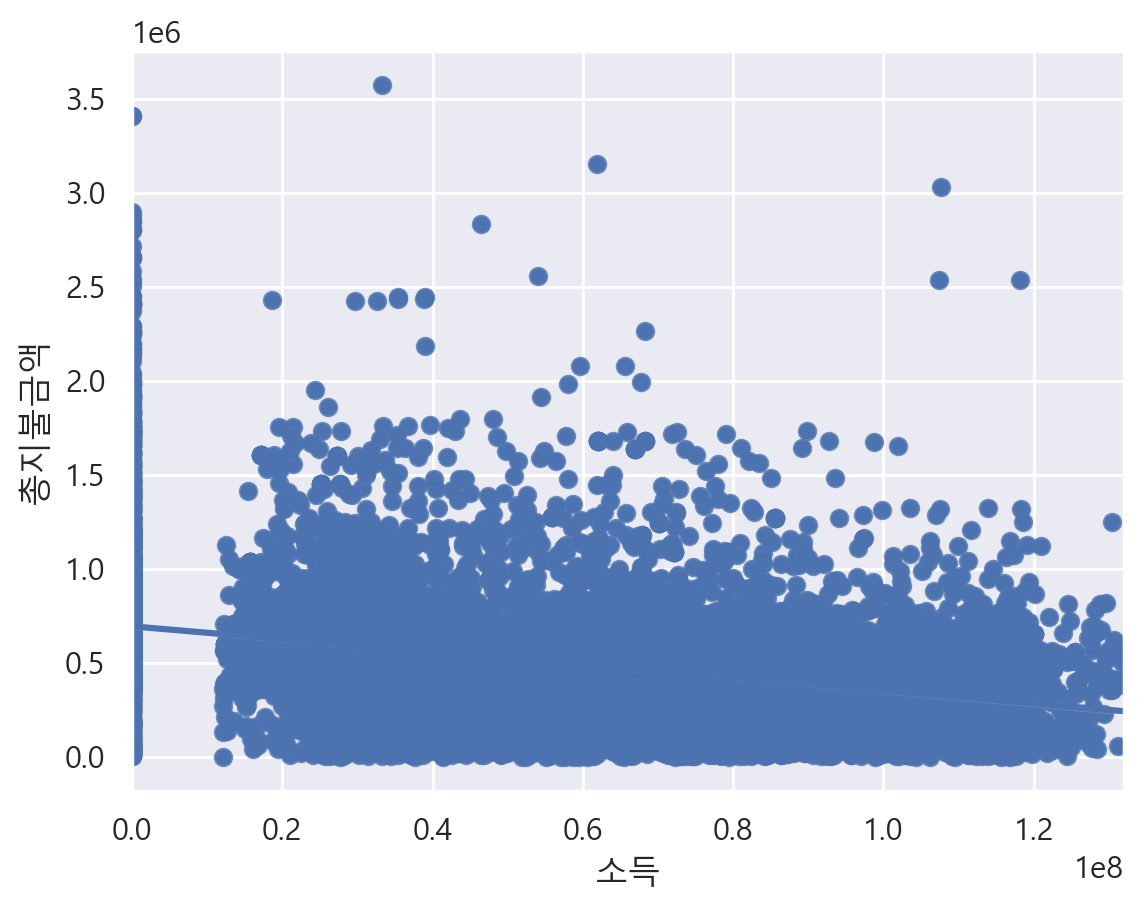

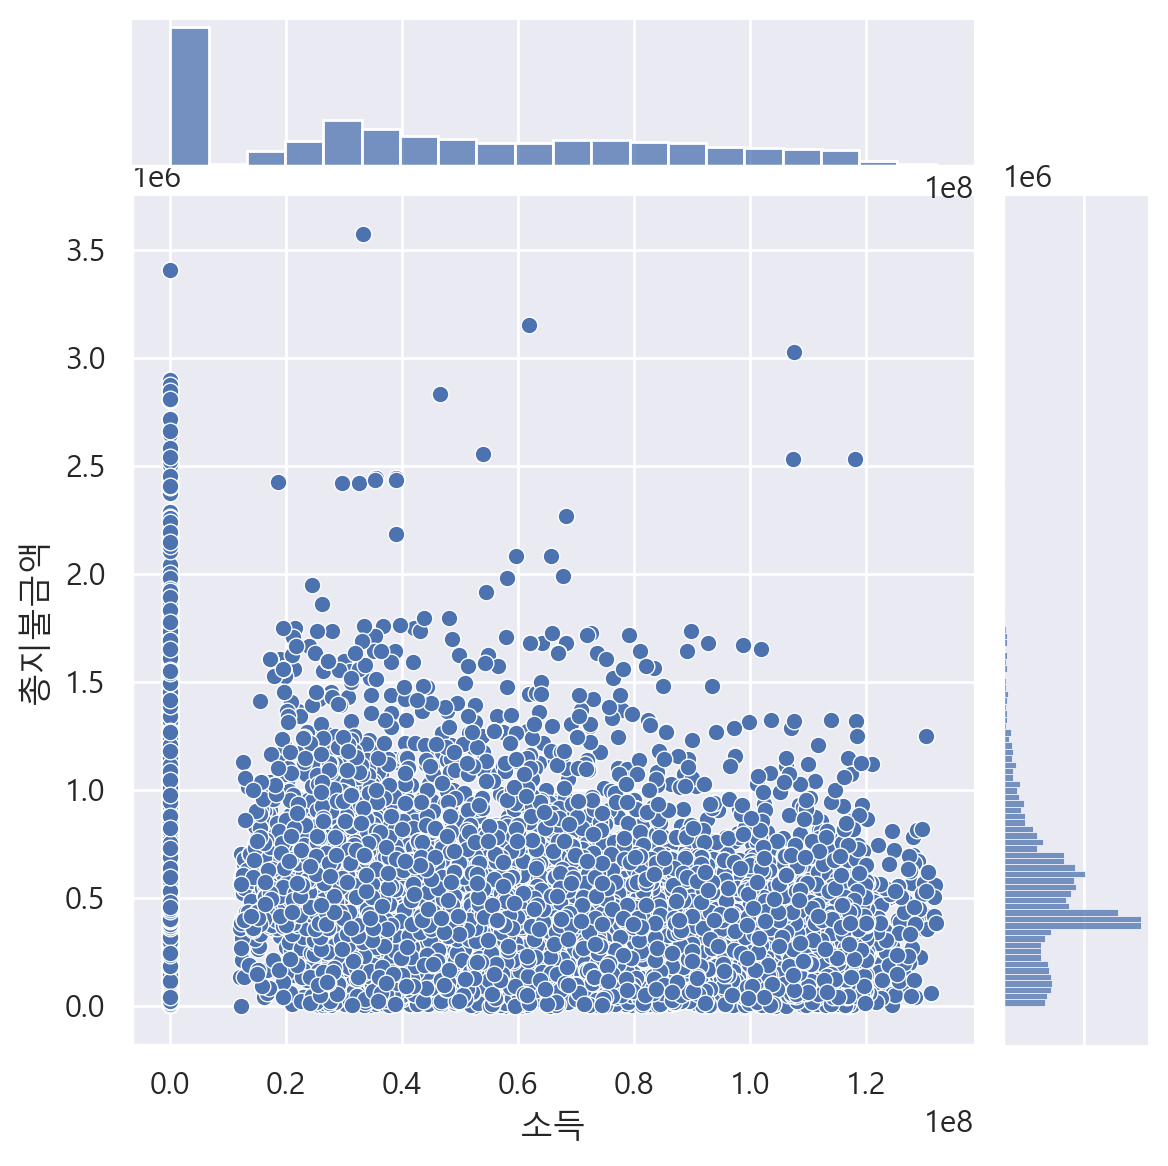

상관계수 : -0.3559084793683354 , P-value : 0.0
: 소득 vs Willingness to pay/Stay
----------------------------------------------------------------------------------------------------


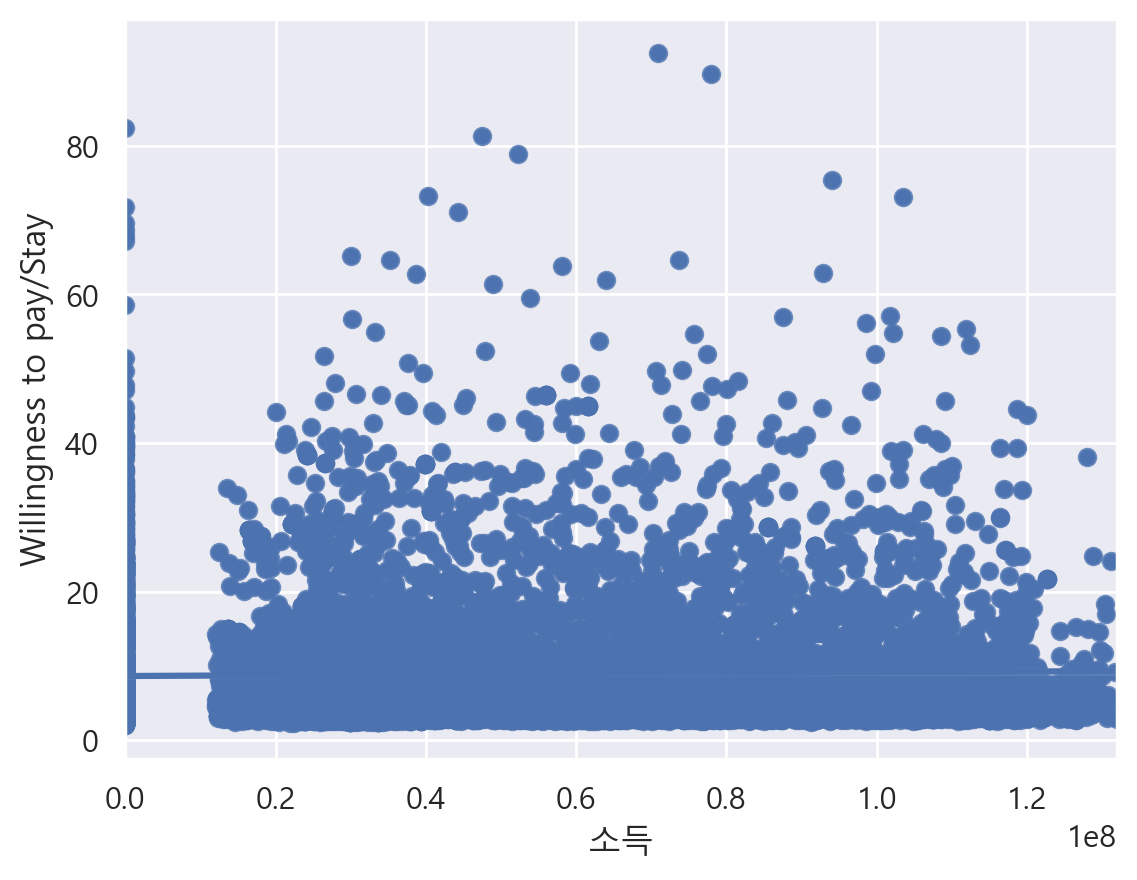

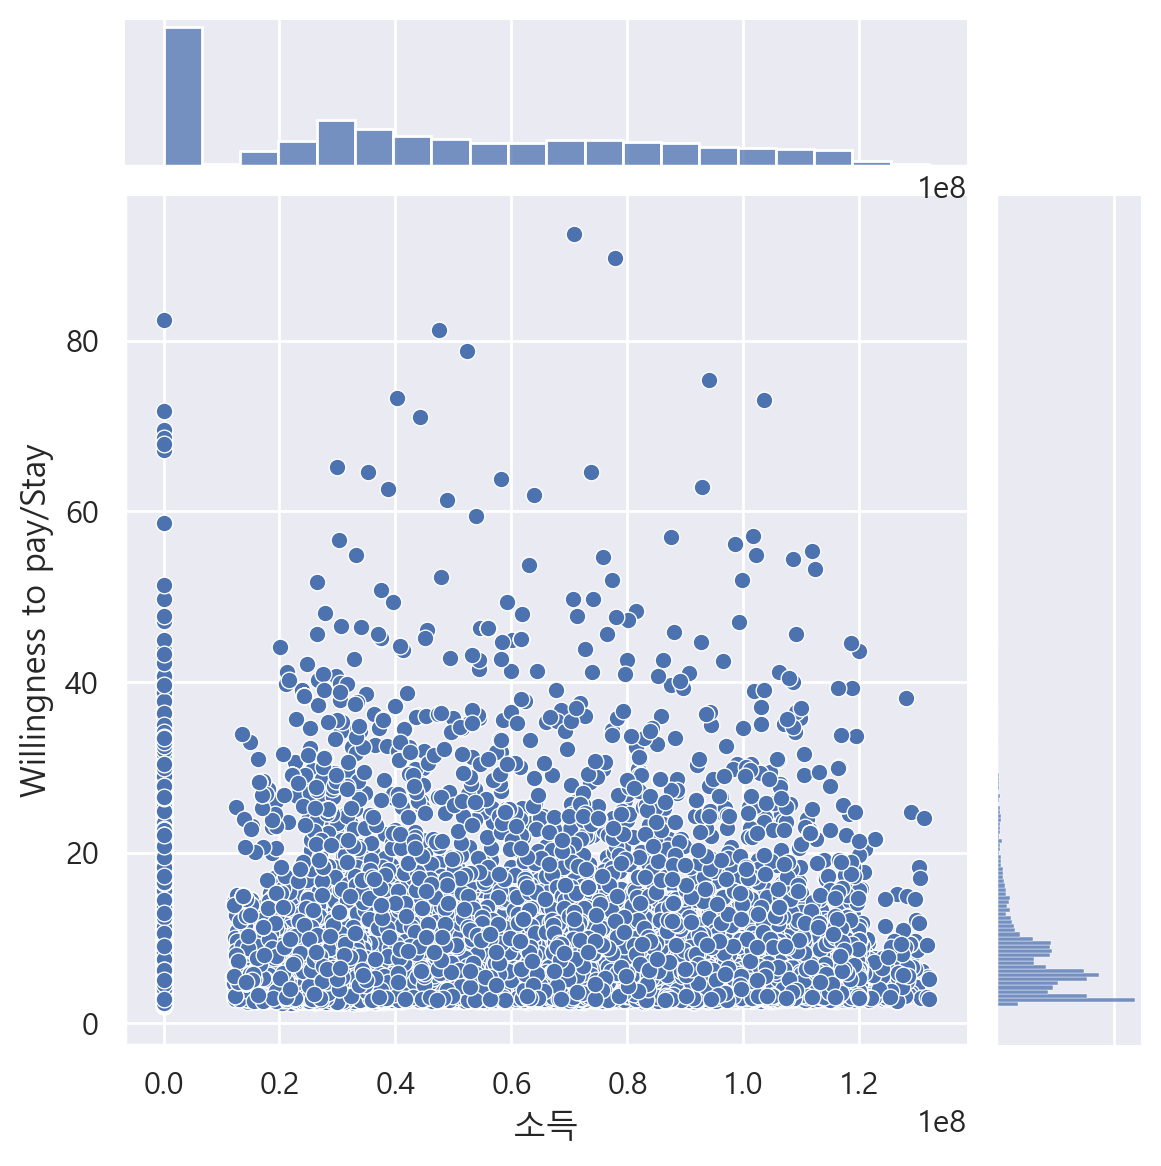

상관계수 : 0.02450686539996408 , P-value : 0.007259143521893926
: 총지불금액 vs Willingness to pay/Stay
----------------------------------------------------------------------------------------------------


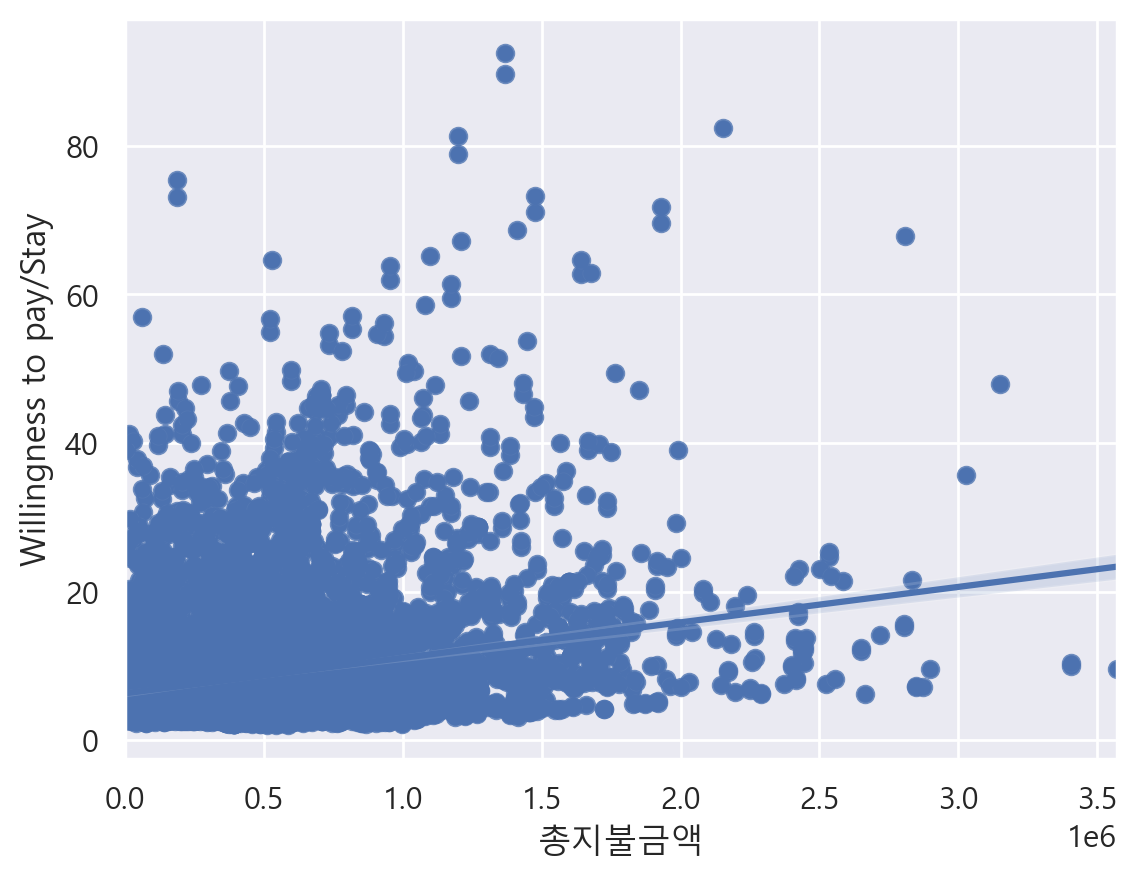

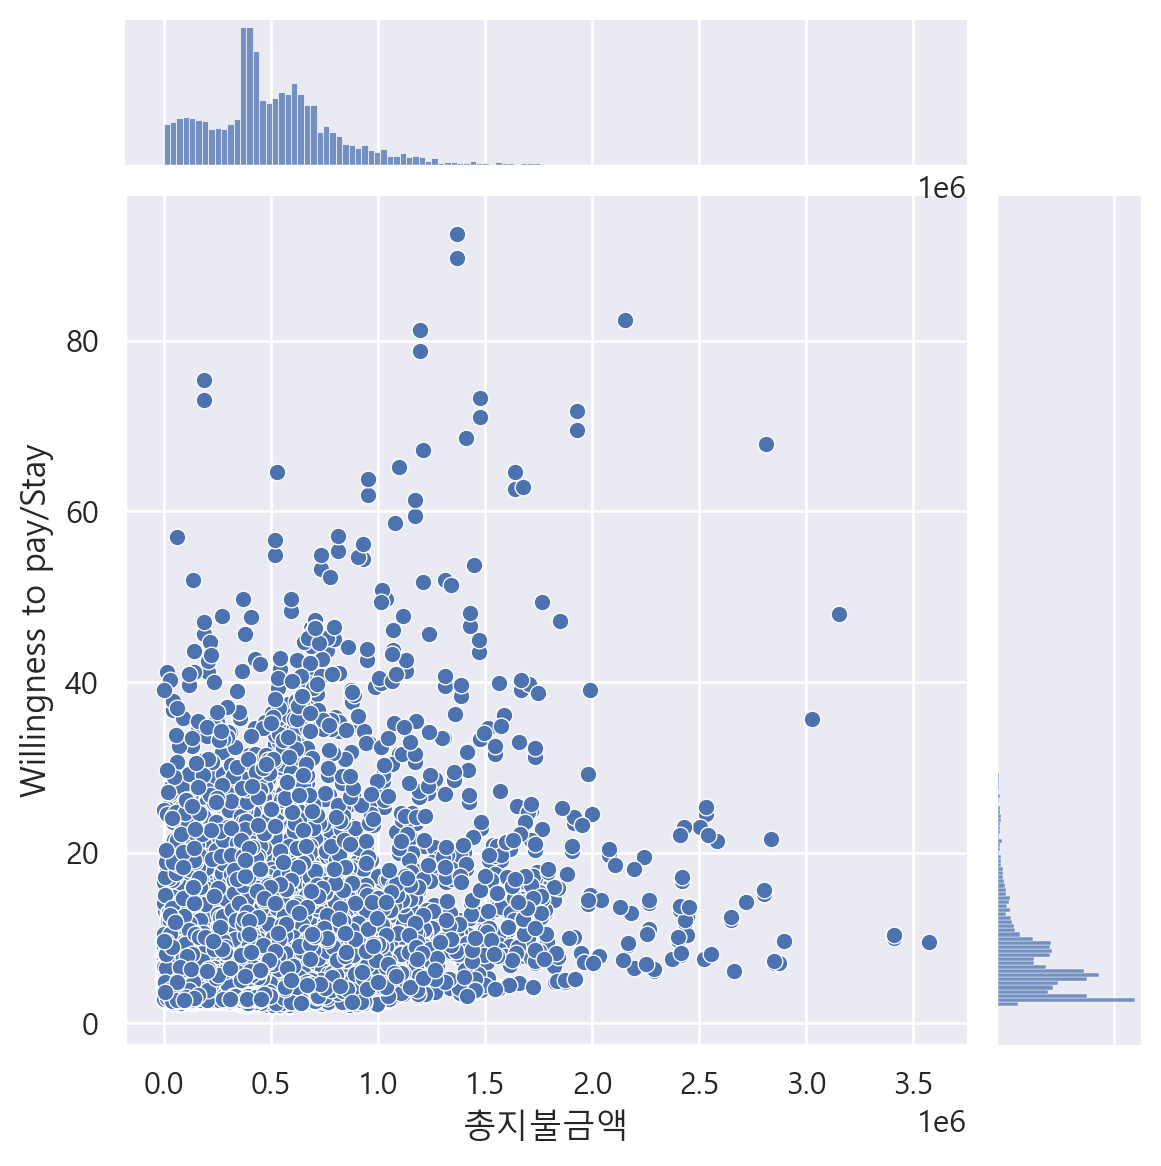

상관계수 : 0.22237301420915806 , P-value : 2.4383076330247345e-134


In [19]:
features = df_int.columns
for i in range(len(features)):
    for j in range(i+1, len(features)):
        col1 = features[i]
        col2 = features[j]
        
        print(f': {col1} vs {col2}')
        print('-' * 100)
        eda_2_nn( col1 , col2 , df_int)

# 1-1. EDA 진행 : 범주형 컬럼

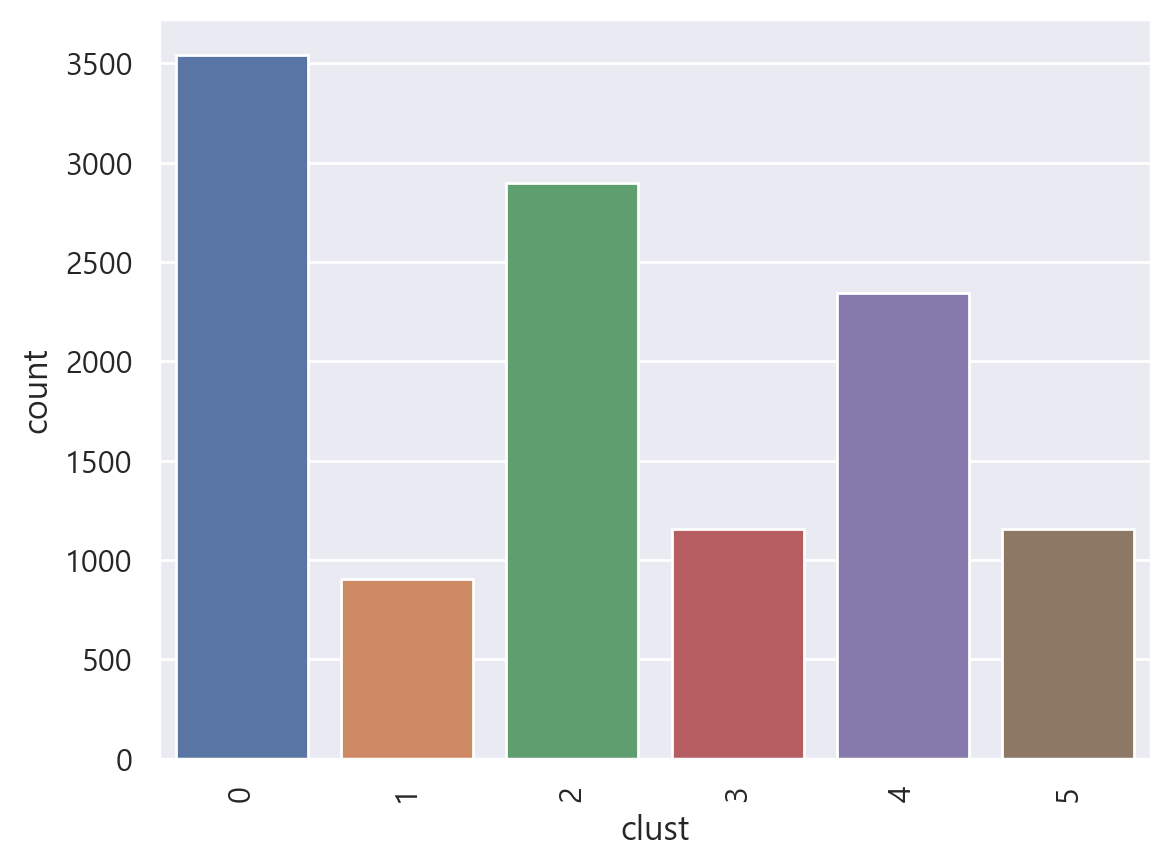

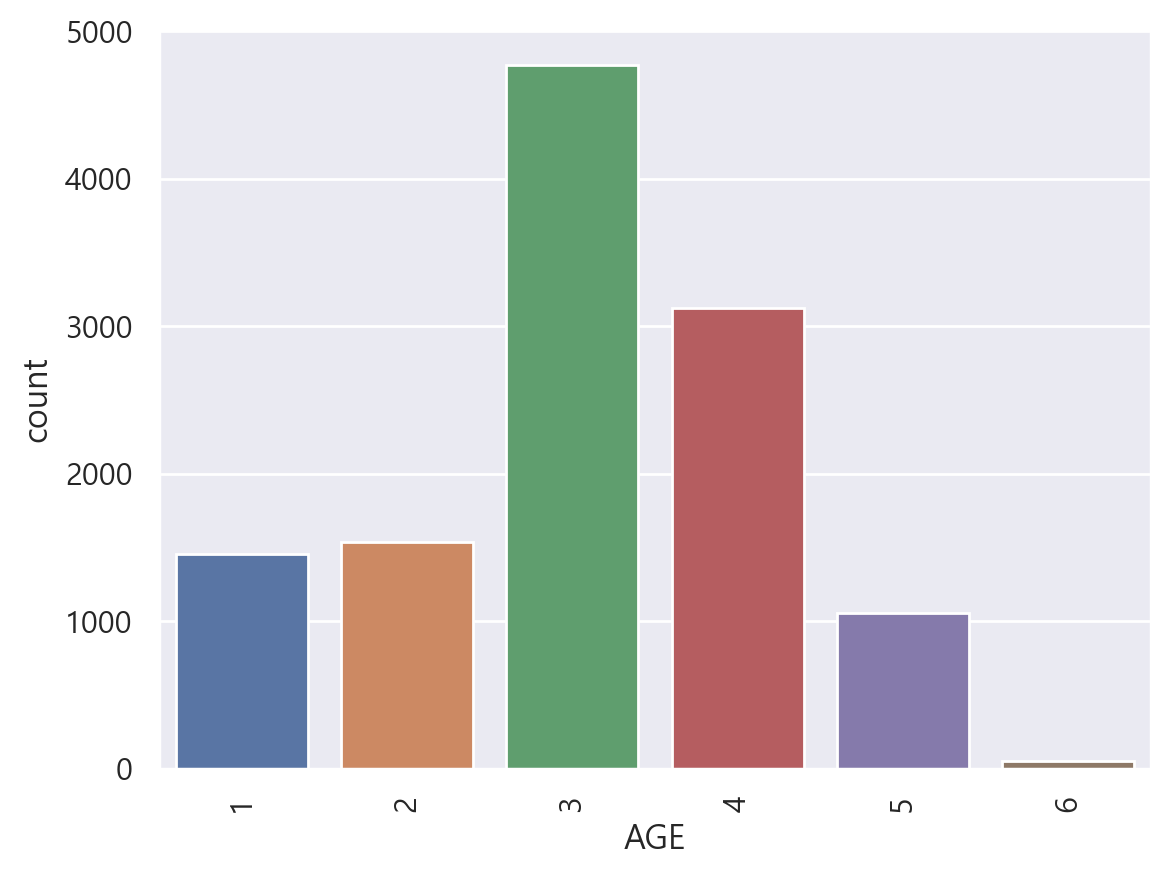

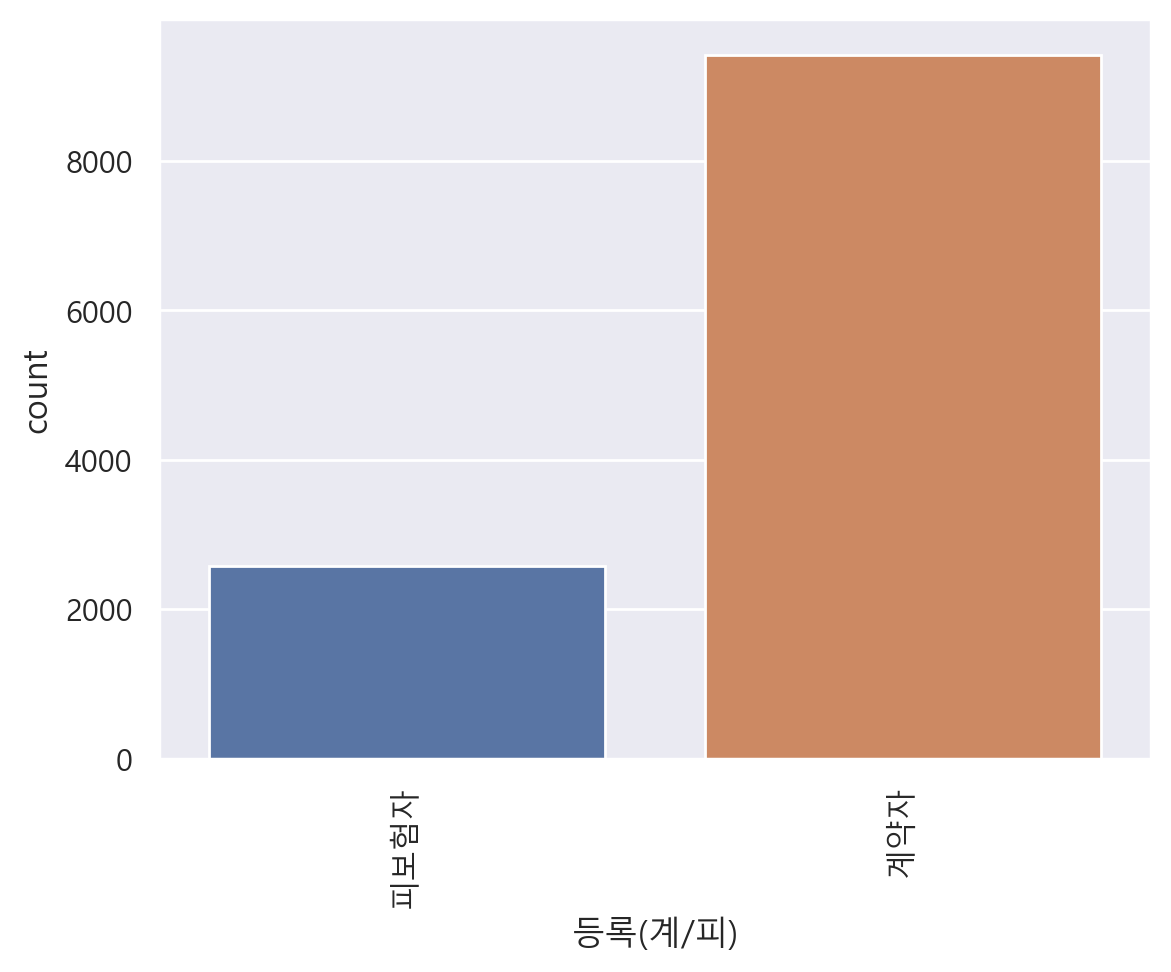

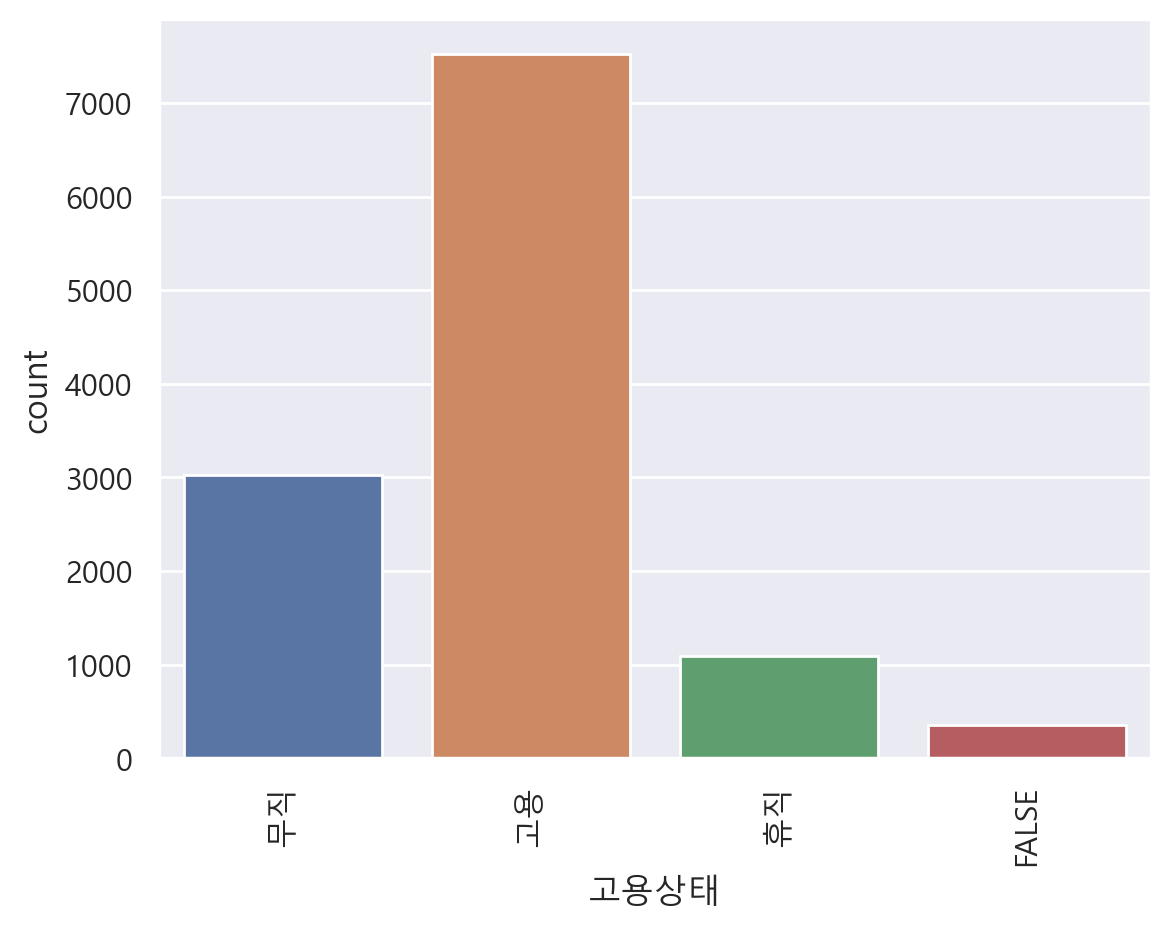

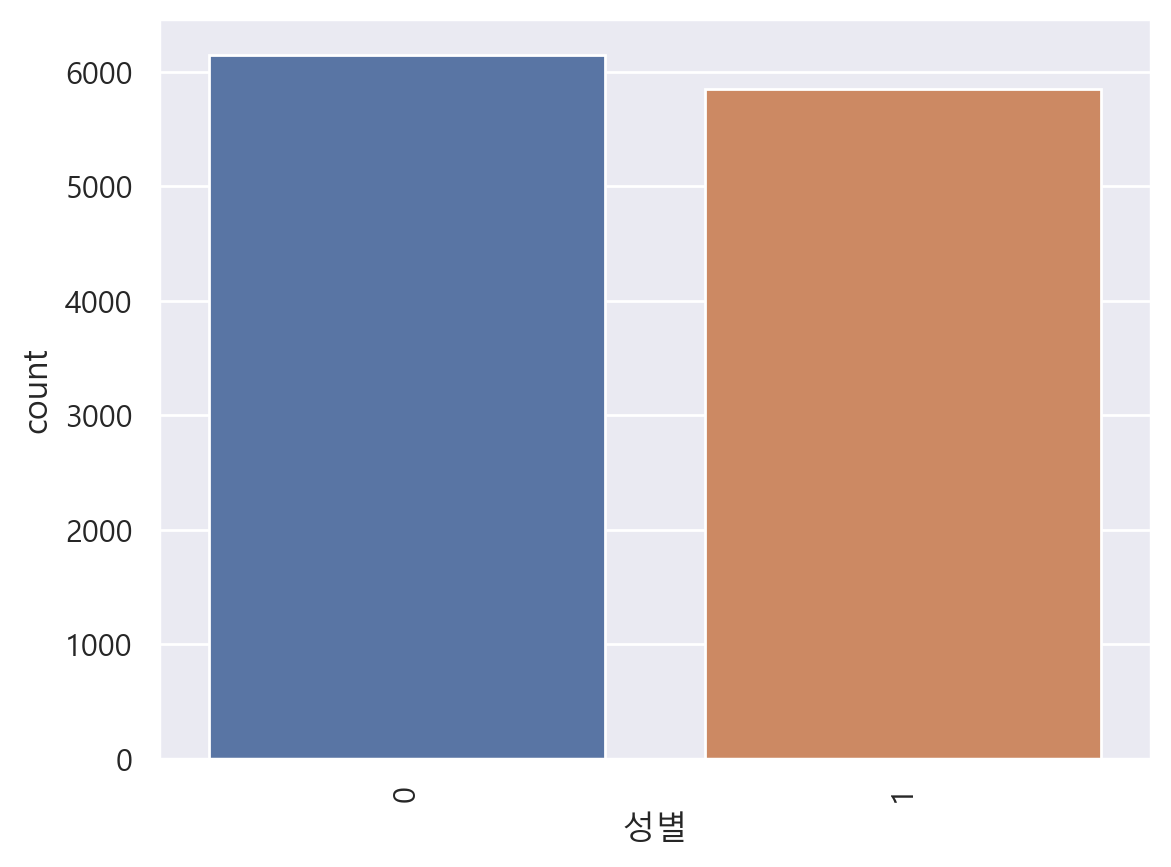

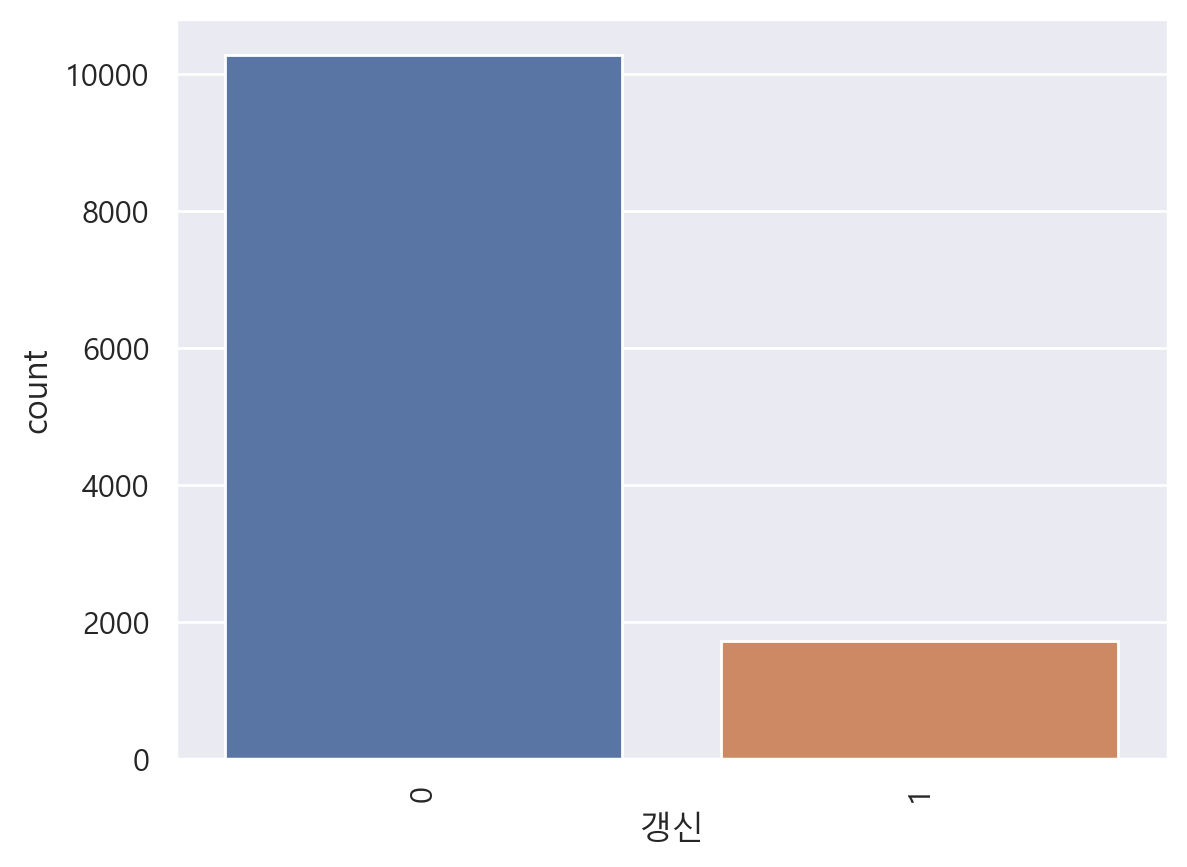

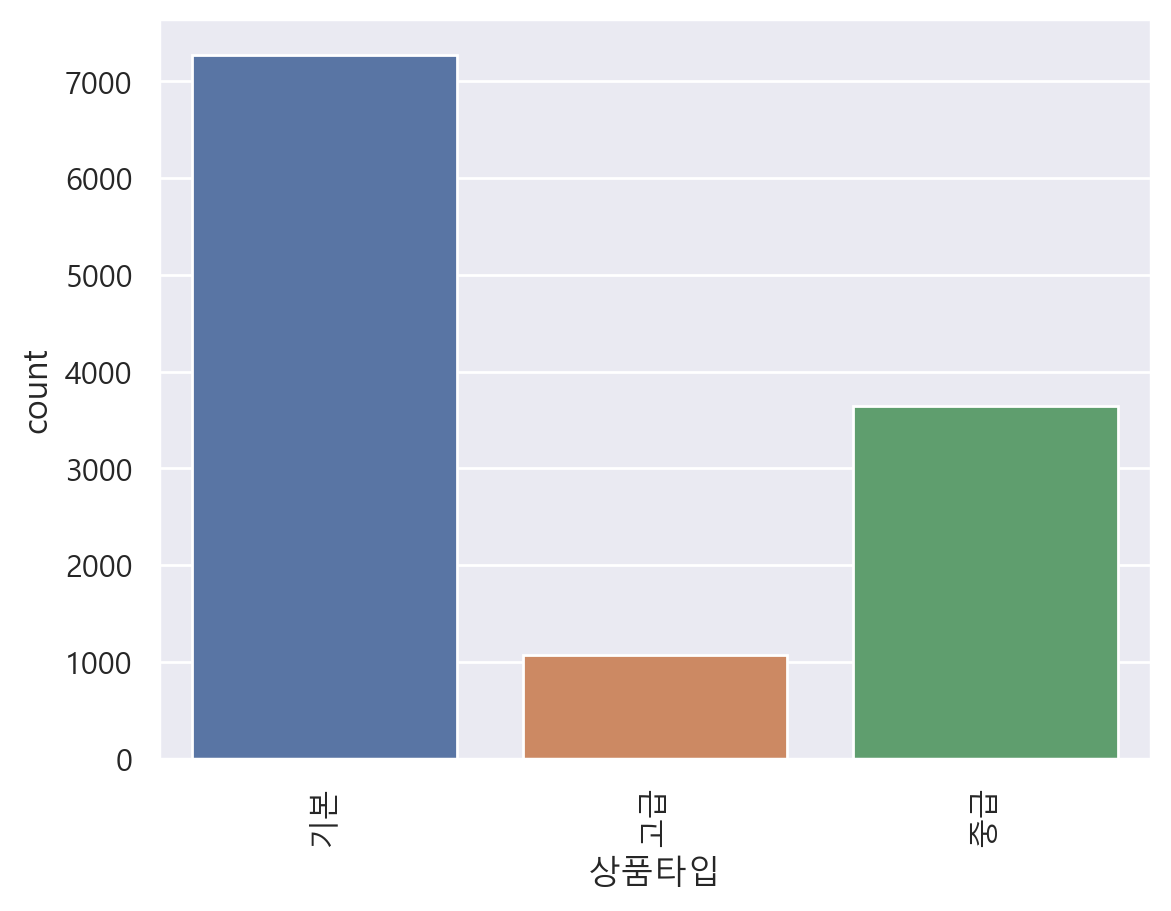

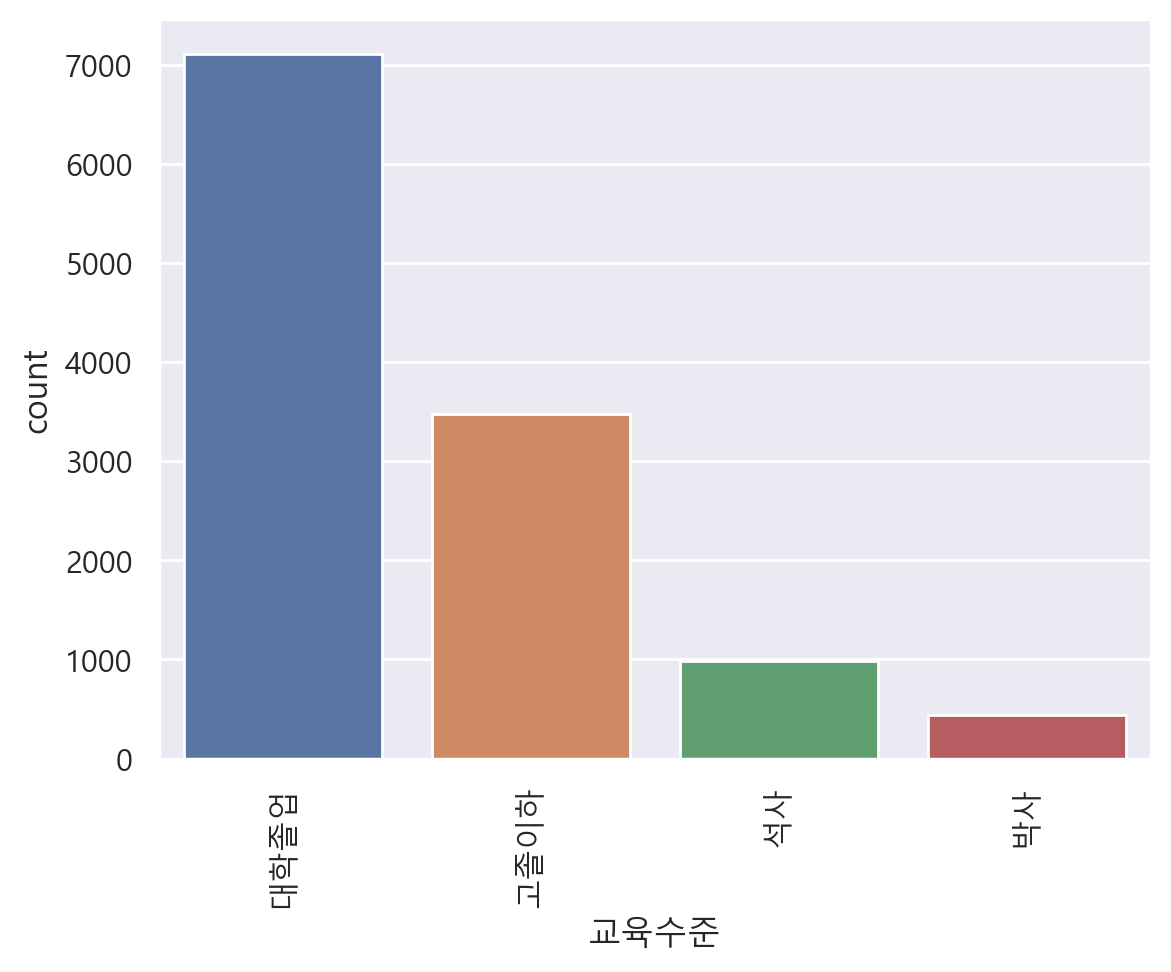

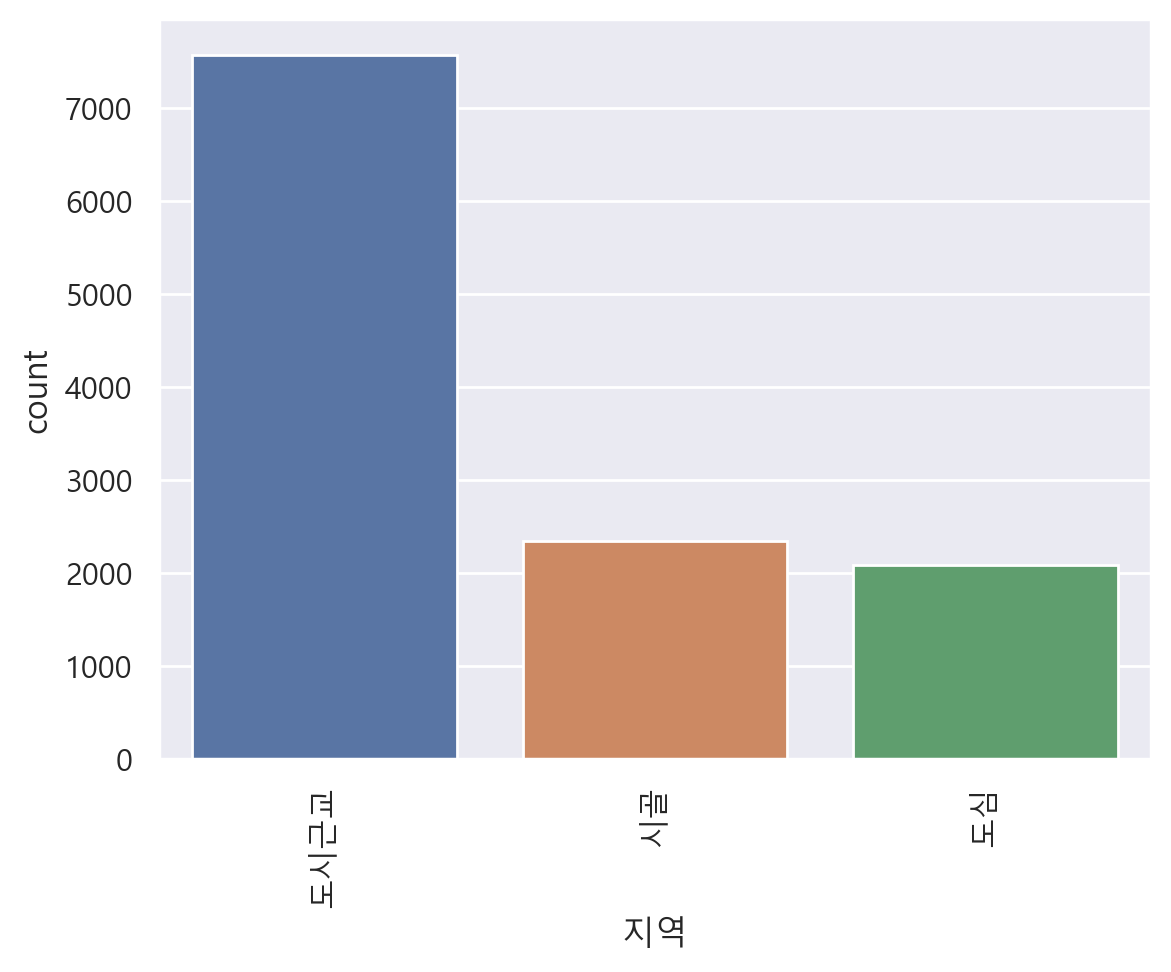

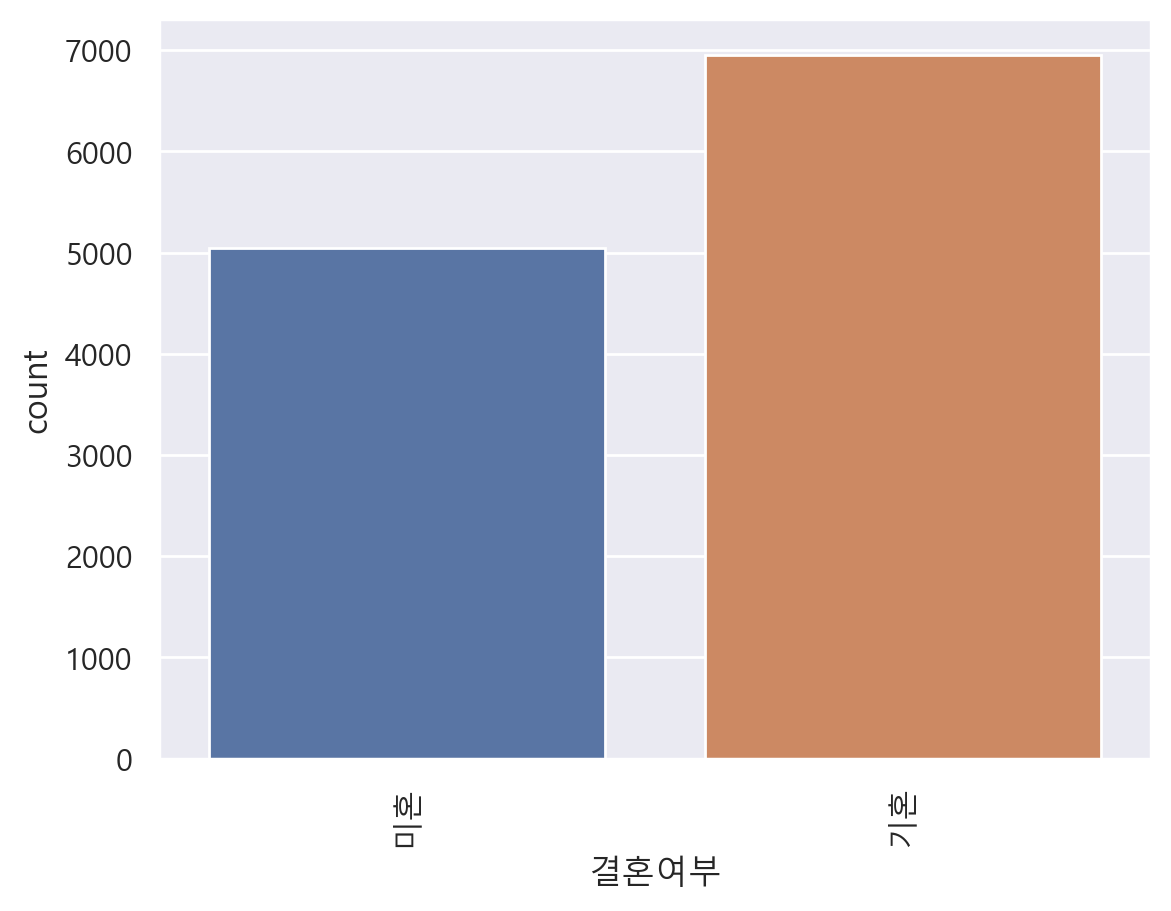

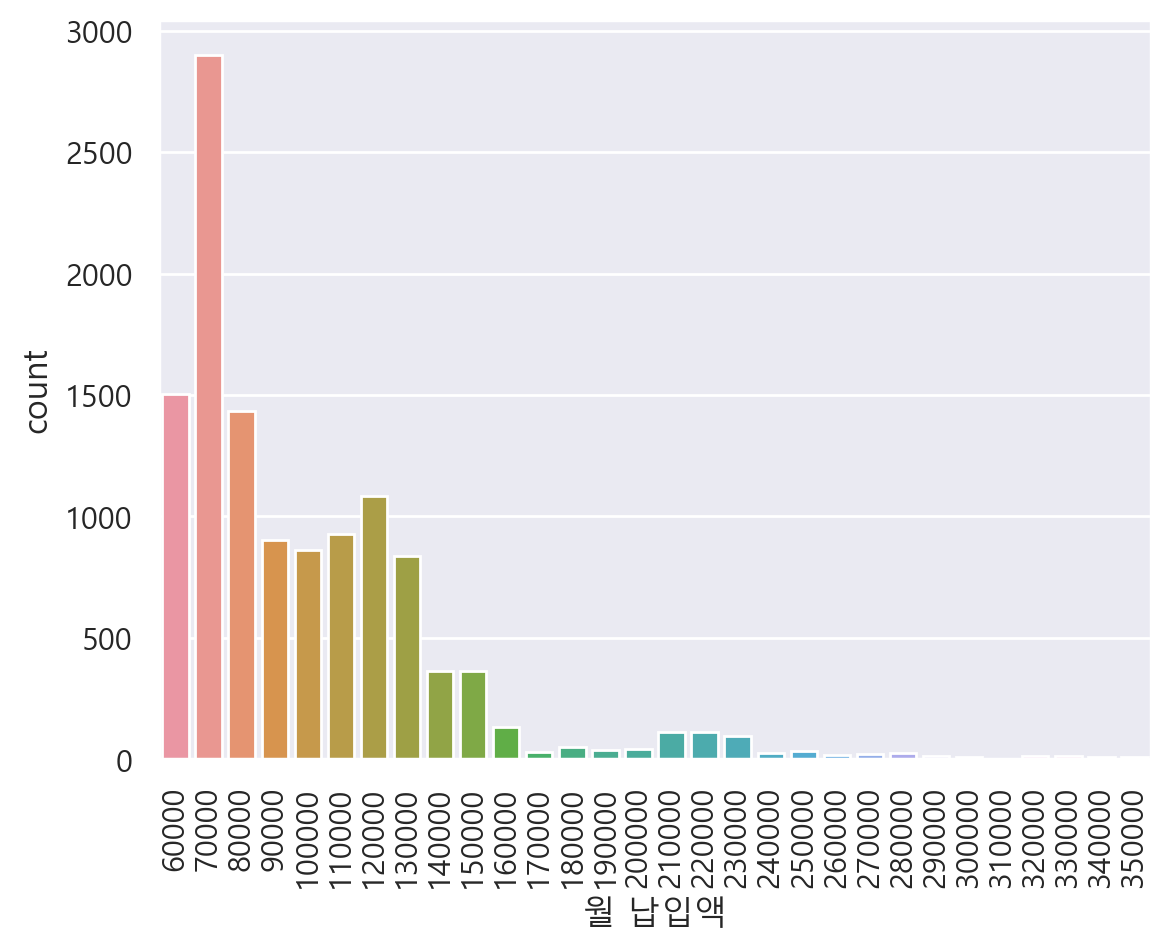

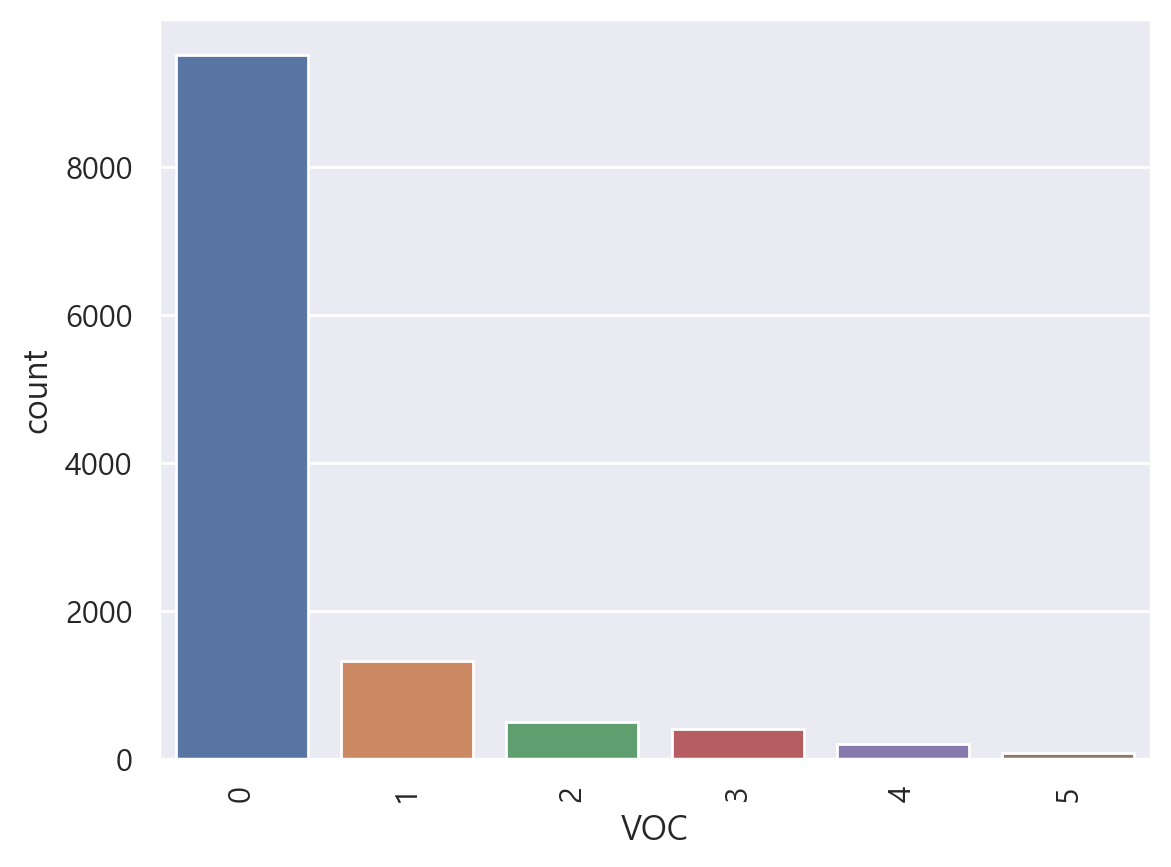

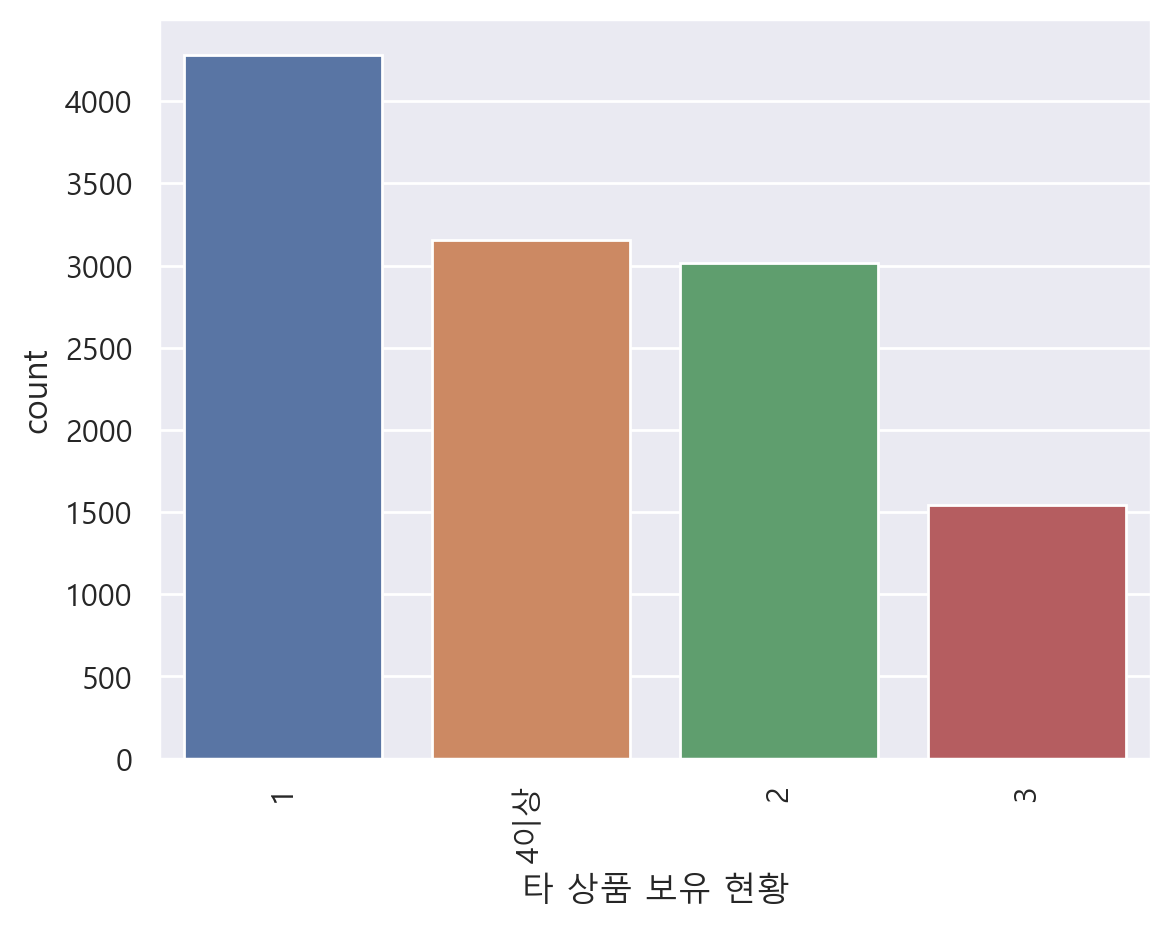

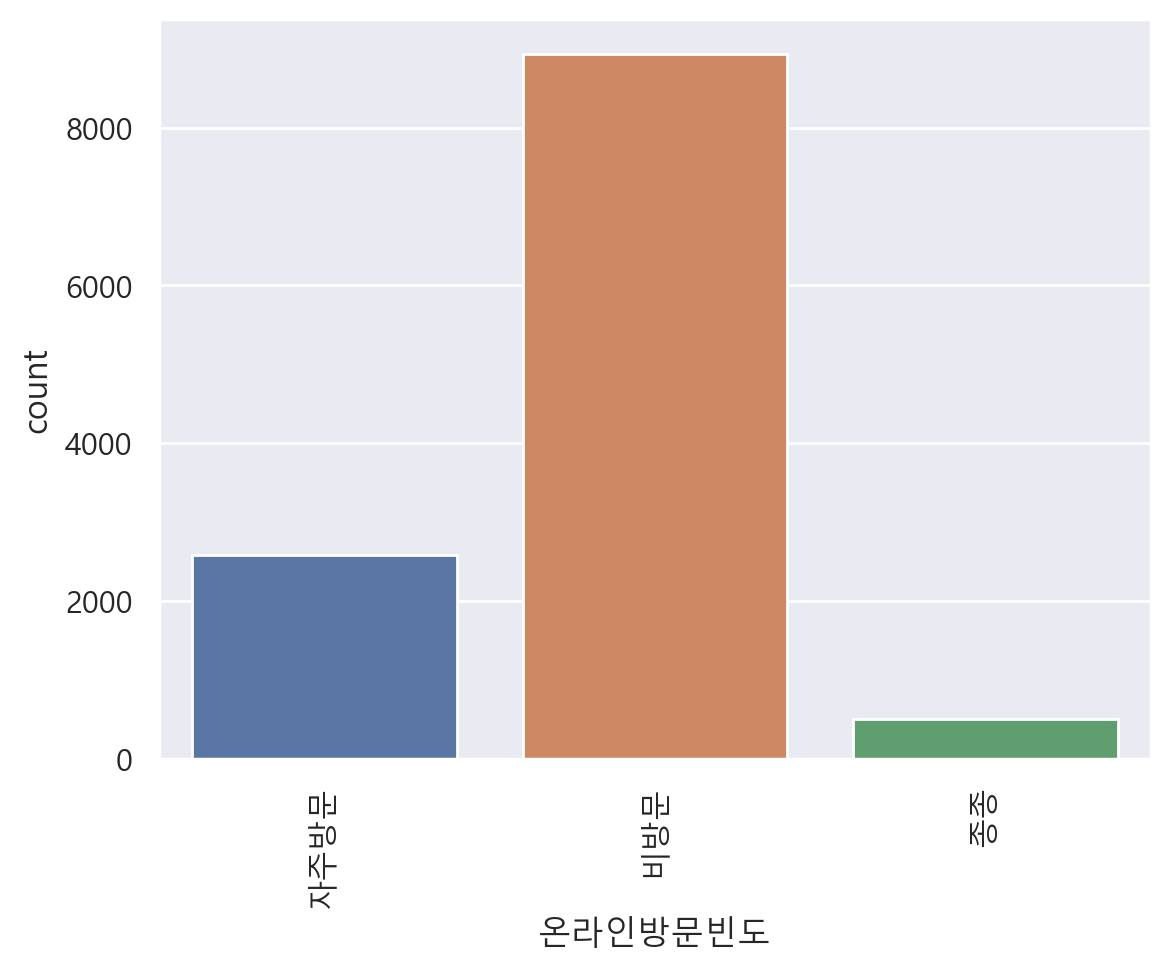

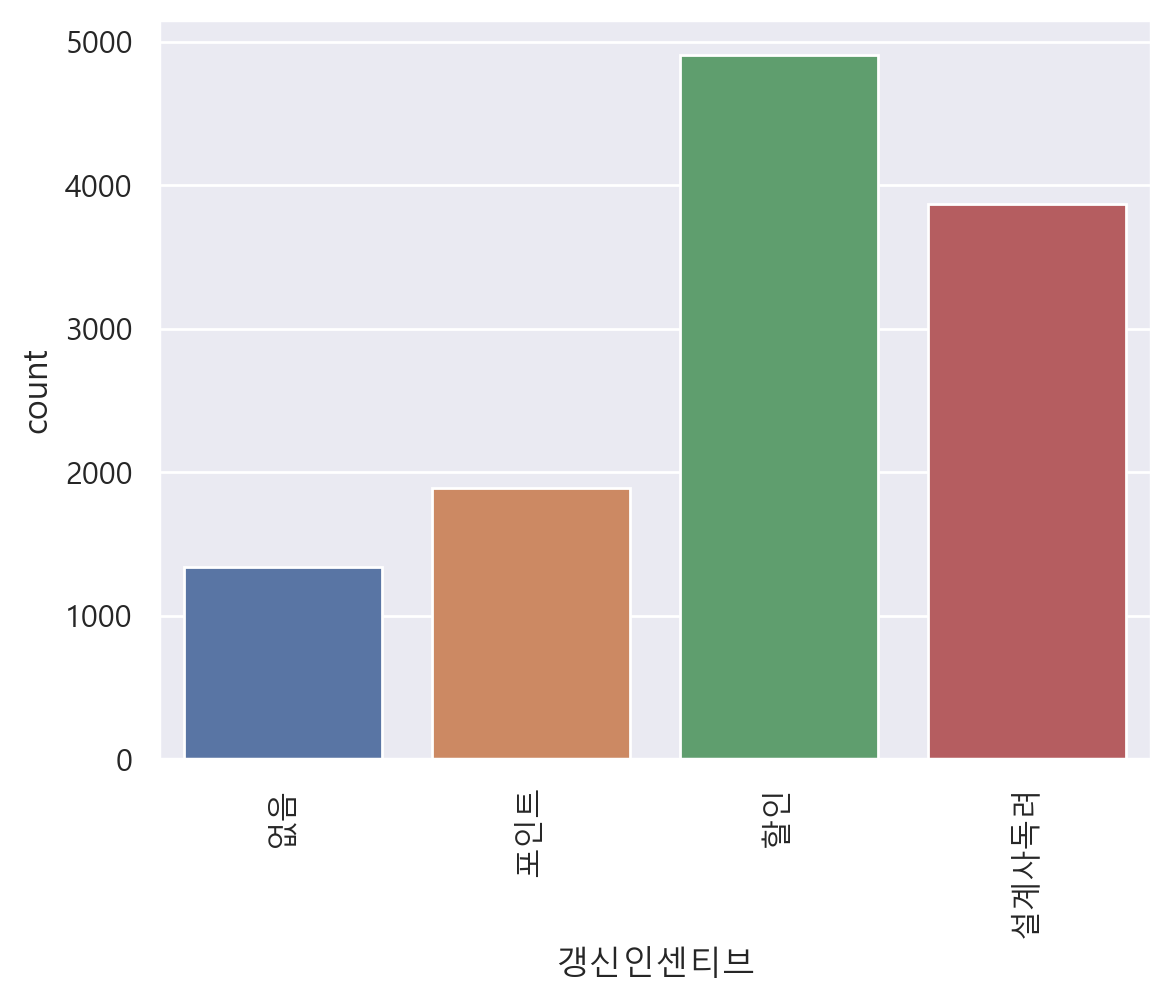

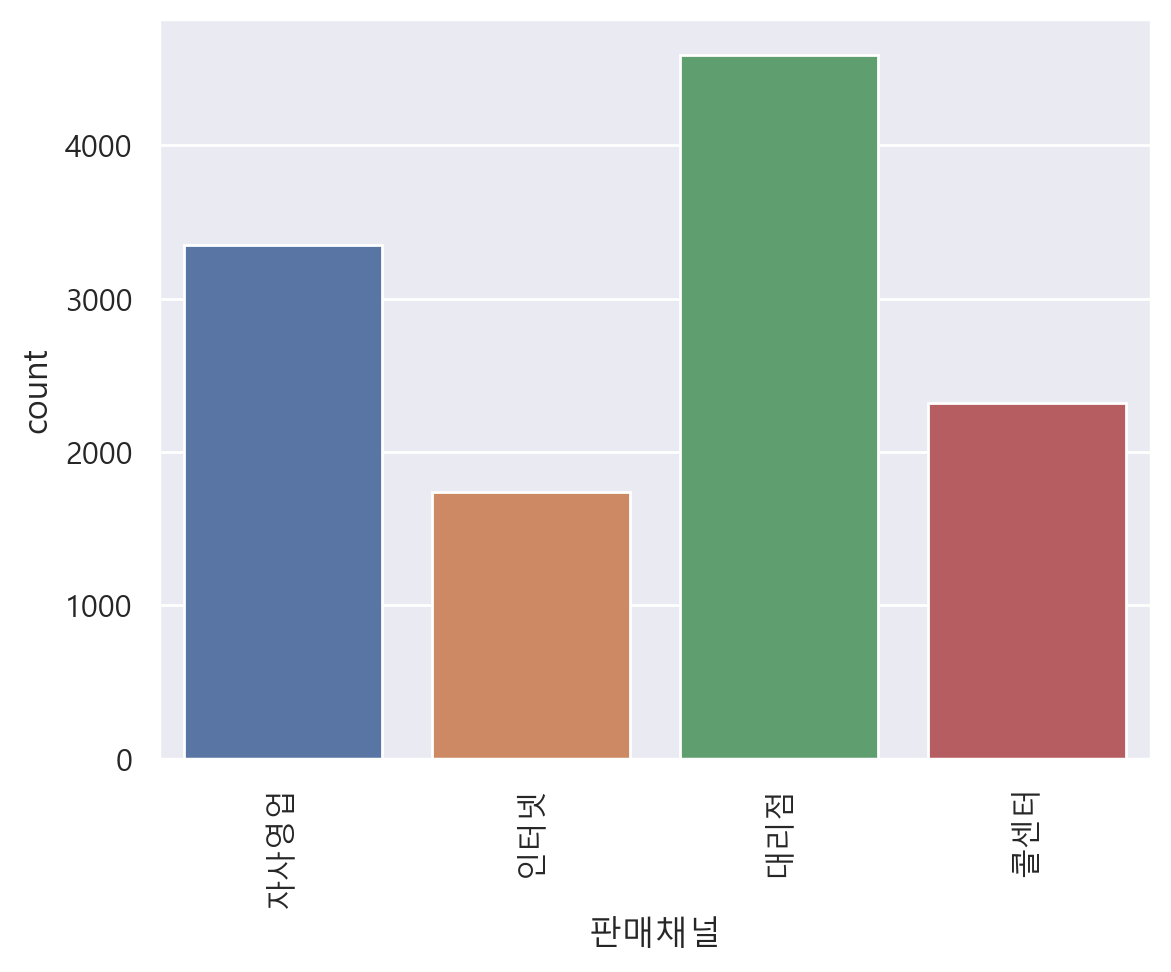

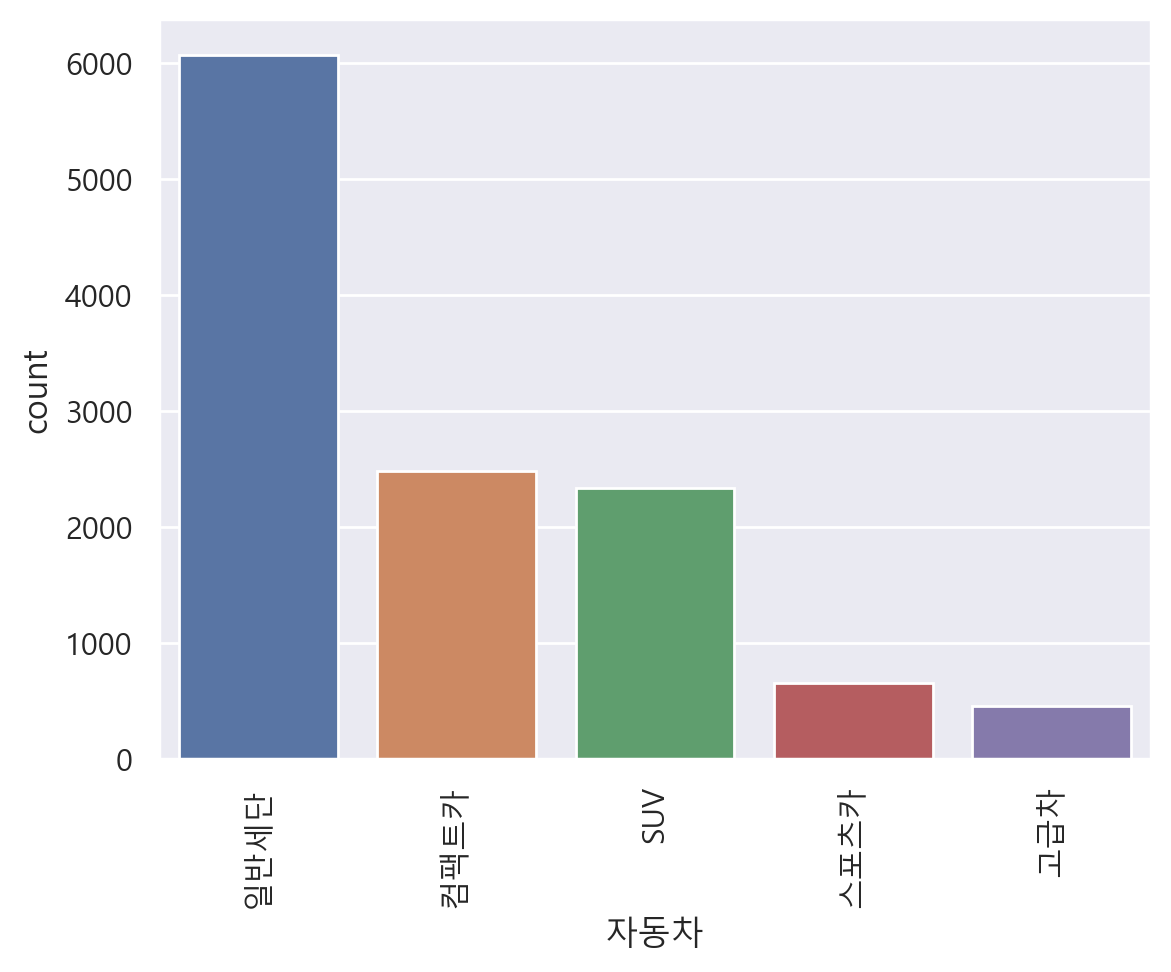

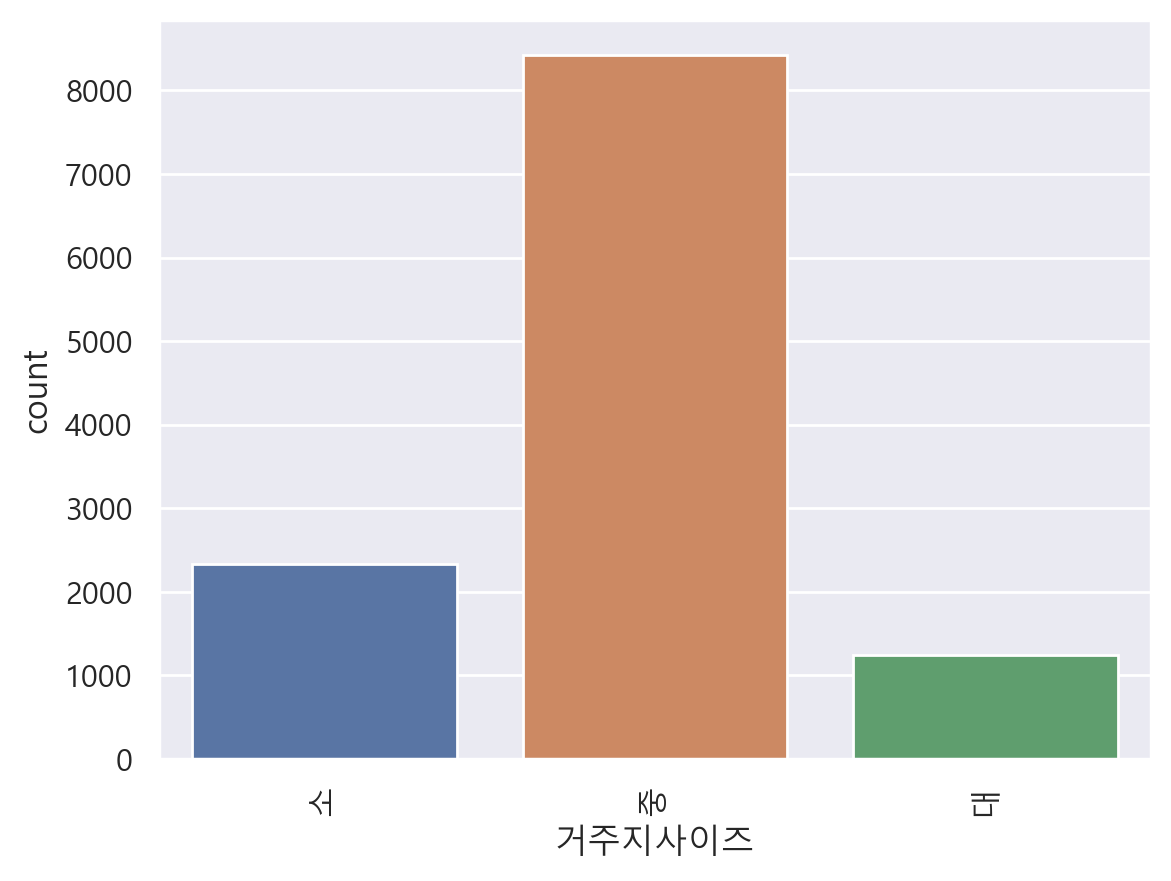

In [20]:
for c in df_bum.columns:
    sns.countplot( c , data = df_bum)
    plt.xticks( rotation = 90)
    plt.show()

## 숫자형 자료들 상관계수 분석

In [21]:
a = df_int.corr()
a

,소득,총지불금액,Willingness to pay/Stay
소득,1.000000,-0.355908,0.024507
총지불금액,-0.355908,1.000000,0.222373
Willingness to pay/Stay,0.024507,0.222373,1.000000


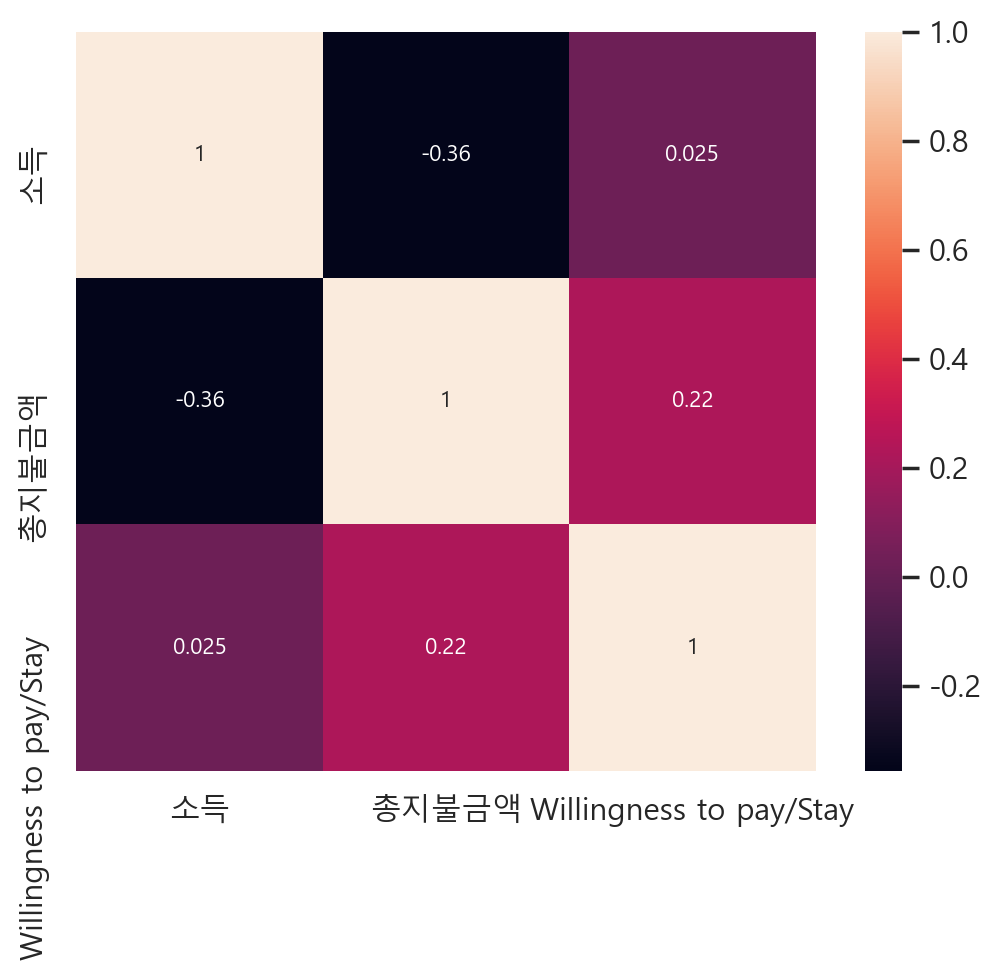

In [22]:
sns.heatmap( a , annot = True , cbar = True , square= True , annot_kws= {'size': 8} )
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 빈 데이터프레임 만들기
vif = pd.DataFrame()

# VIF 확인 및 기록
vif['feature'] = df_int.columns
vif['vif_factor'] = [variance_inflation_factor(df_int.values, i) for i in range(df_int.shape[1])]

# VIF 기준으로 정렬
vif.sort_values(by='vif_factor', ascending=False, inplace=True)
vif.reset_index(drop=True, inplace=True)

# 확인
vif

,feature,vif_factor
0,Willingness to pay/Stay,2.342073
1,총지불금액,2.070672
2,소득,1.606529


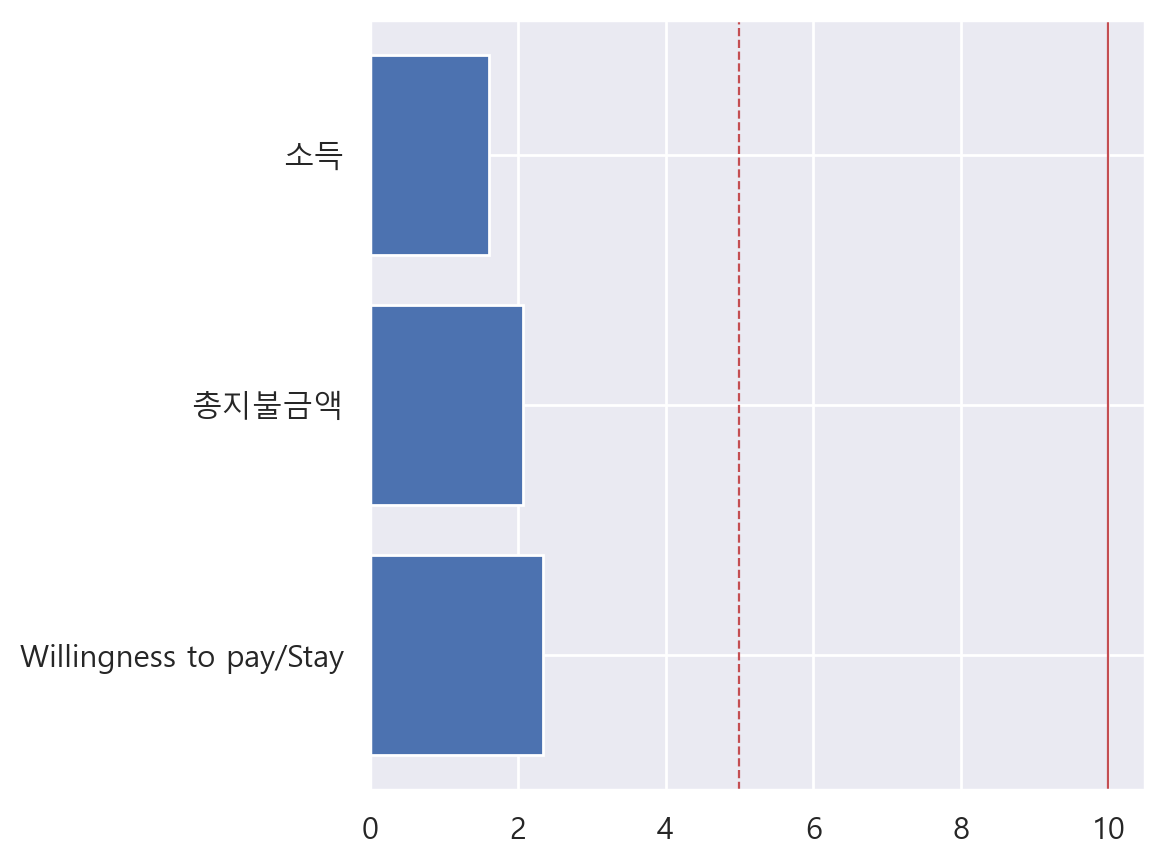

In [24]:
plt.figure(figsize=(5, 5))
plt.barh(y=vif['feature'], width=vif['vif_factor'])
plt.axvline(5, color='r', linestyle='--', linewidth=0.8)
plt.axvline(10, color='r', linestyle='-', linewidth=0.8)
plt.show()

## 2 X 2 시각화: 결혼여부와 등록 시각화

In [25]:
data = df_bum
target = '등록(계/피)'
feature = '결혼여부'

In [26]:
pd.crosstab(data[target], data[feature])

결혼여부,기혼,미혼
등록(계/피),,
계약자,5478,3947
피보험자,1479,1096


In [27]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

결혼여부,기혼,미혼
등록(계/피),,
계약자,0.787408,0.782669
피보험자,0.212592,0.217331


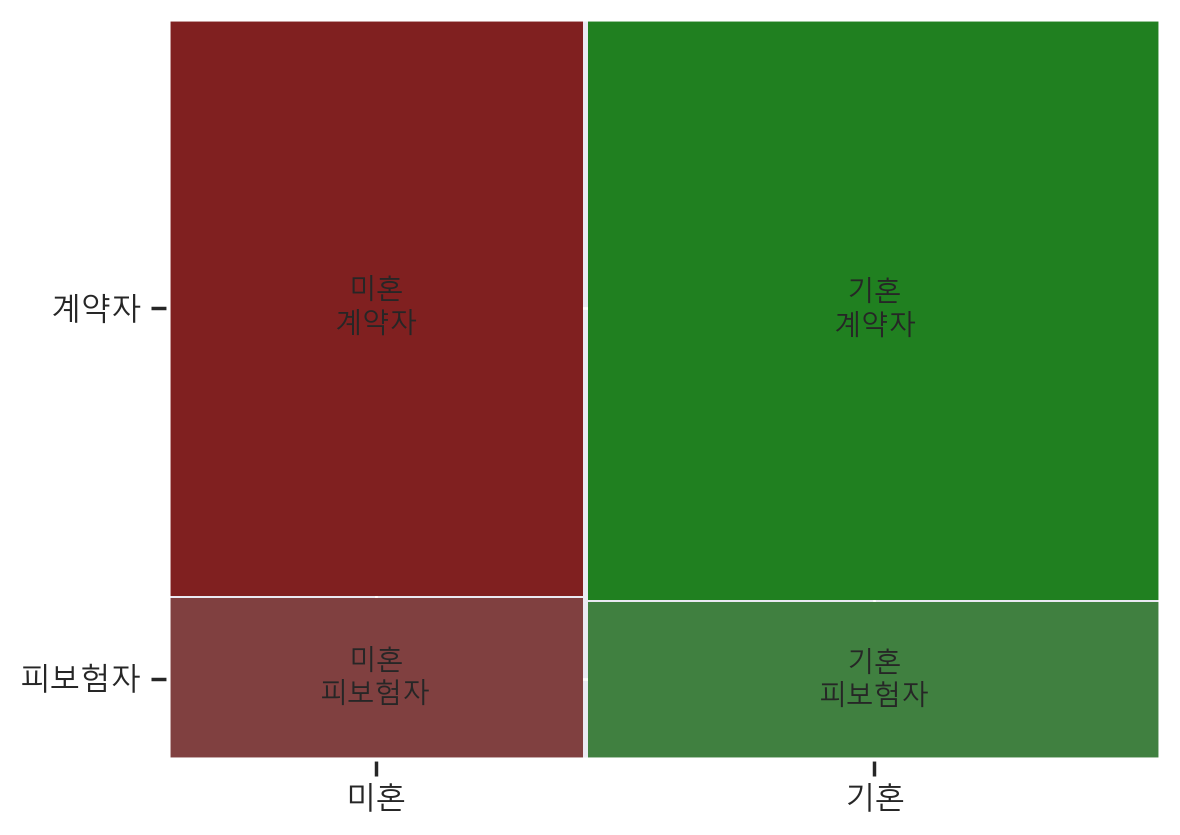

In [28]:
mosaic(data, [ feature,target])
# plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

In [29]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도',result[2])
print('기대빈도\n',result[3])

교차표
 결혼여부       기혼    미혼
등록(계/피)            
계약자      5478  3947
피보험자     1479  1096
----------------------------------------------------------------------------------------------------
카이제곱통계량 0.3620289105551139
p-value 0.5473815840980729
자유도 1
기대빈도
 [[5464.14375 3960.85625]
 [1492.85625 1082.14375]]


#### 통계적으로 유의한 차이가 없으며, 두 범주간의 독립성이 있다. 

# 3 X 3 시각화 : 온라인방문빈도 와 지역

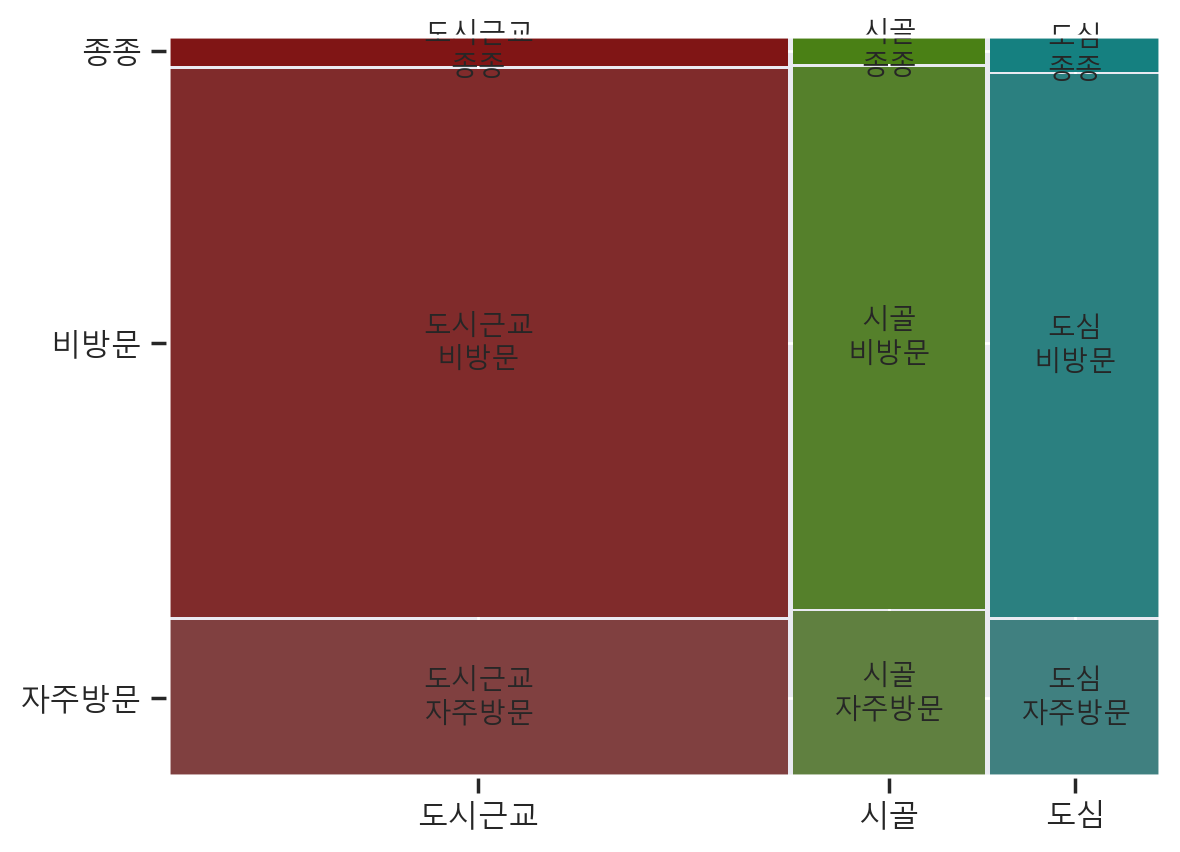

In [30]:
target = '온라인방문빈도'
feature = '지역'
mosaic(data, [ feature,target])
# plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

In [31]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도',result[2])
print('기대빈도\n',result[3])

교차표
 지역       도시근교    도심    시골
온라인방문빈도                  
비방문      5658  1540  1730
자주방문     1607   443   525
종종        307   101    89
----------------------------------------------------------------------------------------------------
카이제곱통계량 4.798113801132444
p-value 0.30864643219149135
자유도 4
기대빈도
 [[5633.568      1550.496      1743.936     ]
 [1624.825       447.19166667  502.98333333]
 [ 313.607        86.31233333   97.08066667]]


#### 통계적으로 유의한 차이가 없으며, 세 범주간의 독립성이 있다. 

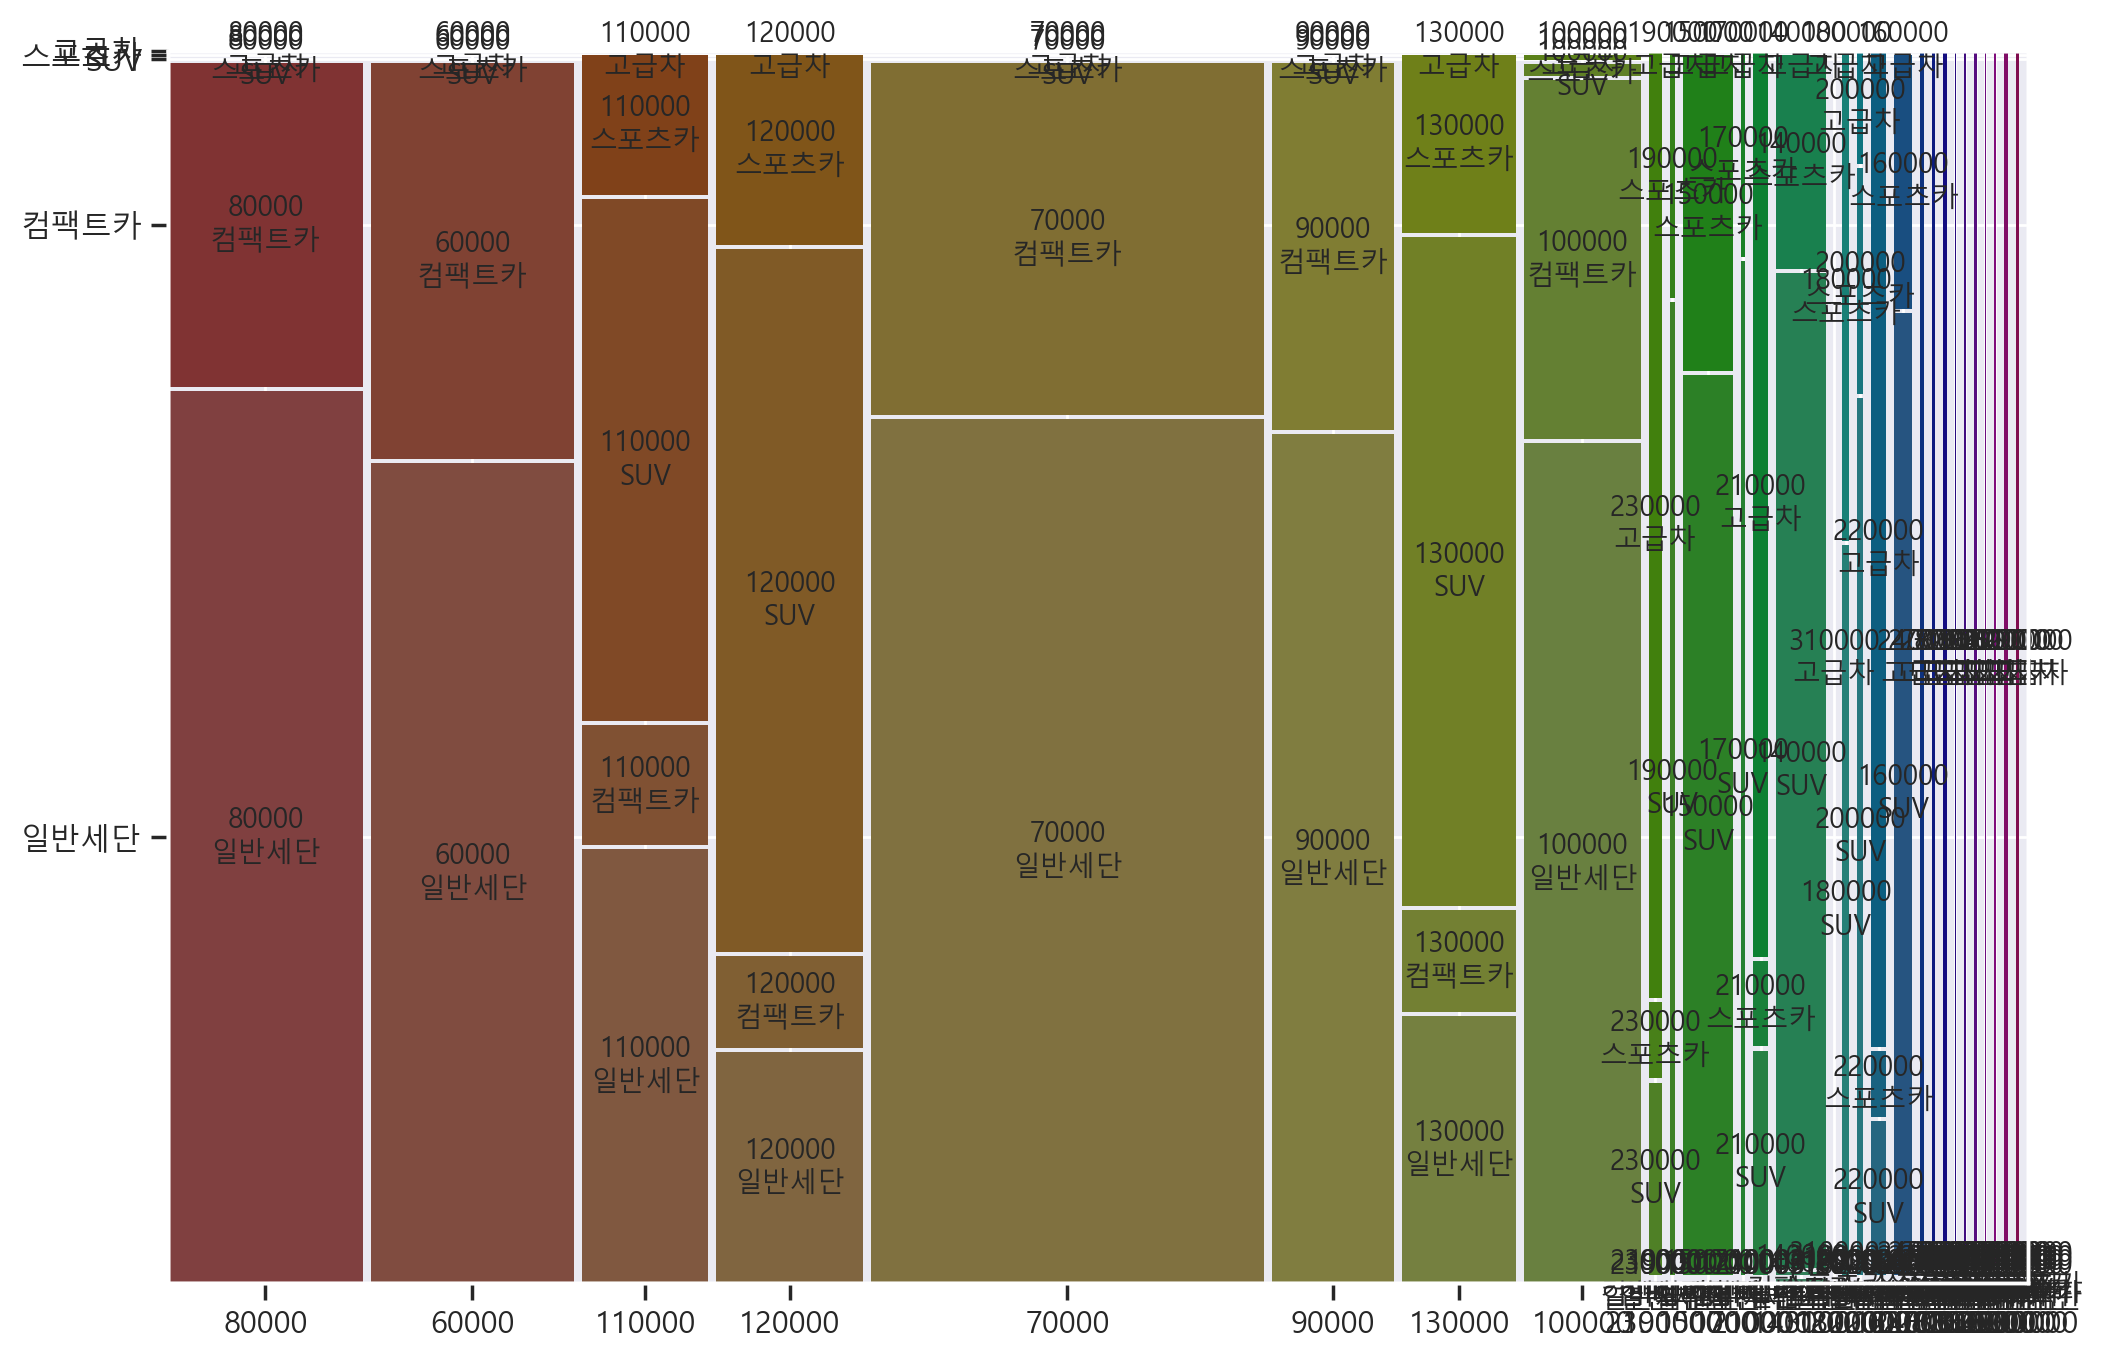

<Figure size 3000x3000 with 0 Axes>

In [32]:
target= '자동차'
feature = '월 납입액'
fig, ax = plt.subplots(figsize=(12, 8)) 
plt.figure( figsize = (30,30))
mosaic(data, [ feature,target] , ax = ax)
plt.show()

In [33]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도',result[2])
print('기대빈도\n',result[3])

교차표
 월 납입액  60000   70000   80000   90000   100000  110000  120000  130000  140000  \
자동차                                                                             
SUV         0       0       0       0       8     399     627     461     297   
고급차         0       0       0       0       0       0       0       0       0   
스포츠카        0       0       0       0       4     107     170     123      64   
일반세단     1014    2060    1052     631     595     331     206     184       1   
컴팩트카      490     839     382     273     255      92      82      70       1   

월 납입액  150000  ...  260000  270000  280000  290000  300000  310000  320000  \
자동차            ...                                                           
SUV       270  ...       0       0       0       0       0       0       0   
고급차         0  ...      17      22      27      13      11       3      15   
스포츠카       95  ...       0       0       0       0       0       0       0   
일반세단        0  ...       0       0   

# 모든 칼럼들 카이제곱 비교

features = df_bum.columns
data = df_bum.copy()
for i in range(len(features)):
    for j in range(i+1, len(features)):
        col1 = features[i]
        col2 = features[j]
        
        print(f"\n\n카이제곱 검정: {col1} vs {col2}")
        print('-' * 100)
        
        # 교차표 생성
        table = pd.crosstab(data[col1], data[col2])
        print('교차표\n', table)
        print('-' * 100)
        
        #모자이크 플롯생성
        target = col1
        feature = col2
        mosaic(data, [ feature,target])
        plt.show()

        # 카이제곱검정
        result = spst.chi2_contingency(table)
        print('카이제곱통계량', result[0])
        print('p-value', result[1])
        print('자유도', result[2])
        print('기대빈도\n', result[3])
        print('-' * 100)

# 통계적으로 유의한 칼럼들만 도출

# 칼럼 리스트
features = data.columns

significant_pairs = []  # 유의한 컬럼 쌍을 저장할 리스트

# 모든 칼럼 쌍에 대한 카이제곱 검정 수행
for i in range(len(features)):
    for j in range(i+1, len(features)):
        col1 = features[i]
        col2 = features[j]
        
        # 교차표 생성
        table = pd.crosstab(data[col1], data[col2])

        # 카이제곱검정
        result = spst.chi2_contingency(table)

        # 카이제곱통계량이 자유도의 2배 이상인 경우
        if result[0] > result[2] * 2:
            significant_pairs.append((col1, col2))

# 유의한 컬럼 쌍 출력
print("카이제곱 통계량이 자유도의 2배 이상인 컬럼 쌍:")
for pair in significant_pairs:
    print(pair)

In [34]:
features[0]

'소득'

# 3.범주 vs 숫자

features1 = df_bum.columns
features2 = df_int.columns
data1 = df_bum.copy()
data2 = df_int.copy()

for i in range(len(features1)):
    for j in range(len(features2)):
        col1 = features1[i]
        col2 = features2[j]
        
        print(f"\n\nbarplot: {col1} vs {col2}")
        print('-' * 100)
        
        # barplot
        sns.barplot(x=data1[col1], y=data2[col2])
        plt.show()

In [35]:
features1 = df_bum.columns
features2 = df_int.columns
data1 = df_bum.copy()
data2 = df_int.copy()

In [36]:
data1[[col1]] 

KeyError: "None of [Index(['총지불금액'], dtype='object')] are in the [columns]"

In [ ]:
data2[[col2]]

In [ ]:
sns.histplot(hue=data1[col1], x=data2[col2], kde = True)
plt.xlabel( col1 , fontsize = 20)
plt.show()

In [ ]:
col1 = '자동차'
col2 = '월 납입액'
sns.histplot(hue=df_bum[col1], x=df_bum[col2], kde = True)
plt.show()

In [ ]:
# Histplot
sns.histplot(hue=df_bum[col1], x=df_bum[col2], kde=True)

# 각 범주의 중앙값에 대한 세로선 추가
categories = df_bum[col1].unique()
for category in categories:
    median_value = df_bum[df_bum[col1] == category][col2].median()
    plt.axvline(median_value, color='red', linestyle='--', alpha=0.3) # alpha는 선의 투명도를 조절합니다.

plt.show()

# 4. 숫자 VS 범주

features1 = df_bum.columns
features2 = df_int.columns
data1 = df_bum.copy()
data2 = df_int.copy()

for i in range(len(features1)):
    for j in range(len(features2)):
        col1 = features1[i]
        col2 = features2[j]
        
        print(f"\n\nbarplot: {col1} vs {col2}")
        print('-' * 100)
        
        # barplot
        sns.histplot(hue=data1[col1], x=data2[col2], kde = True)
        plt.show()

# KDE 시각화

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df_object = df.select_dtypes(include = 'object' )  

In [ ]:
df_object

In [ ]:
encoders = {}
label_data = {}

for col in df_object.columns:
    le = LabelEncoder()
    le.fit(df_object[col])
    labels = le.transform(df_object[col])
    df_object[col] = labels
    
    encoders[col] = le
    label_data[col] = labels

In [ ]:
df_object.head()

In [ ]:
df.info()

In [ ]:
df_num = df.select_dtypes(include = 'int' ) 

In [ ]:
df_num

In [ ]:
df_object

In [ ]:
df_bum1 = pd.concat( [df_num , df_object] , axis = 1)
df_bum1

In [ ]:
df_bum1[col2]

In [ ]:
label_data

In [ ]:
label_data

In [ ]:
# Plotting
sns.kdeplot(x=df_bum1[col1], y=df_bum1[col2],
    color="blue",               # 색상 설정
    shade=True,                 # 곡선 아래 채우기
    shade_lowest=False,         # 가장 낮은 영역 채우지 않기
    linestyle="--",             # 점선 스타일 사용
    linewidth=2,                # 선 너비 설정
    bw_adjust=1.5 ).grid(False)

# x축 눈금 및 라벨 설정
original_labels = encoders['자동차'].inverse_transform(sorted(list(set(df_bum1[col1]))))
plt.xticks(ticks=sorted(list(set(df_bum1[col1]))), labels=original_labels)
plt.xlabel( col1 , fontsize = 20 )
plt.ylabel( col2 , fontsize = 20 )

plt.show()

In [ ]:
col1 = '자동차'
col2 = '월 납입액'
sns.kdeplot(x=df_bum1[col1], y=df_bum1[col2], common_norm = False , multiple = 'fill')
plt.show()

features1 = df_bum1.columns
features2 = df_int.columns
data1 = df_bum1.copy()
data2 = df_int.copy()

for i in range(len(features1)):
    for j in range(len(features2)):
        col1 = features1[i]
        col2 = features2[j]
        
        print(f"\n\nkdeplot: {col1} vs {col2}")
        print('-' * 100)
        
        sns.kdeplot(x=data1[col1], y=data2[col2], common_norm = False , multiple = 'fill')
        plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
sns.kdeplot(x=df_bum1[col1], y=df_bum1[col2],
    color="blue",               # 색상 설정
    shade=True,                 # 곡선 아래 채우기
    shade_lowest=False,         # 가장 낮은 영역 채우지 않기
    linestyle="--",             # 점선 스타일 사용
    linewidth=2,                # 선 너비 설정
    bw_adjust=1.5 ).grid(False)

# x축 눈금 및 라벨 설정
original_labels = encoders['고용상태'].inverse_transform(sorted(list(set(df_bum1[col1]))))
plt.xticks(ticks=sorted(list(set(df_bum1[col1]))), labels=original_labels)
plt.xlabel( col1 , fontsize = 20 )
plt.ylabel( col2 , fontsize = 20 )

plt.show()

In [ ]:
col1 = '고용상태'
col2 = '소득'
sns.kdeplot(x=df_bum1[col1], y=df_bum1[col2], common_norm = False , multiple = 'fill')
original_labels = encoders['고용상태'].inverse_transform(sorted(list(set(df_bum1[col1]))))
plt.xticks(ticks=sorted(list(set(df_bum1[col1]))), labels=original_labels)
plt.show()

# VIF지수 및 상관계수 확인

In [ ]:
df_1 = pd.concat( [df_int,df_bum1] , axis = 1)
df_1.columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 빈 데이터프레임 만들기
vif = pd.DataFrame()

# VIF 확인 및 기록
vif['feature'] = df_1.columns
vif['vif_factor'] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]

# VIF 기준으로 정렬
vif.sort_values(by='vif_factor', ascending=False, inplace=True)
vif.reset_index(drop=True, inplace=True)

# 확인
vif

In [ ]:
plt.figure(figsize=(5, 5))
plt.barh(y=vif['feature'], width=vif['vif_factor'])
plt.axvline(5, color='r', linestyle='--', linewidth=0.8)
plt.axvline(10, color='r', linestyle='-', linewidth=0.8)
plt.show()

# 1. Minmax 스케일링 진행

In [ ]:
from sklearn.preprocessing import MinMaxScaler
col_x = list(df_1)
scaler = MinMaxScaler()
df_2 = scaler.fit_transform(df_1)
df_2 = pd.DataFrame(df_2, columns=col_x)

In [ ]:
df_2

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 빈 데이터프레임 만들기
vif = pd.DataFrame()

# VIF 확인 및 기록
vif['feature'] = df_2.columns
vif['vif_factor'] = [variance_inflation_factor(df_2.values, i) for i in range(df_2.shape[1])]

# VIF 기준으로 정렬
vif.sort_values(by='vif_factor', ascending=False, inplace=True)
vif.reset_index(drop=True, inplace=True)

# 확인
vif

In [ ]:
plt.figure(figsize=(5, 5))
plt.barh(y=vif['feature'], width=vif['vif_factor'])
plt.axvline(5, color='r', linestyle='--', linewidth=0.8)
plt.axvline(10, color='r', linestyle='-', linewidth=0.8)
plt.show()

# 2. Standard 스케일링 진행

In [ ]:
from sklearn.preprocessing import StandardScaler
col_x = list(df_1)
scaler = StandardScaler()
df_3 = scaler.fit_transform(df_1)
df_3 = pd.DataFrame(df_3, columns=col_x)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 빈 데이터프레임 만들기
vif = pd.DataFrame()

# VIF 확인 및 기록
vif['feature'] = df_3.columns
vif['vif_factor'] = [variance_inflation_factor(df_3.values, i) for i in range(df_3.shape[1])]

# VIF 기준으로 정렬
vif.sort_values(by='vif_factor', ascending=False, inplace=True)
vif.reset_index(drop=True, inplace=True)

# 확인
vif

In [ ]:
plt.figure(figsize=(5, 5))
plt.barh(y=vif['feature'], width=vif['vif_factor'])
plt.axvline(5, color='r', linestyle='--', linewidth=0.8)
plt.axvline(10, color='r', linestyle='-', linewidth=0.8)
plt.show()

In [ ]:
# 저장
df_3.to_csv( 'standard.csv', index = False)

In [ ]:
a = df_1.corr()
plt.figure( figsize = (15,15))
sns.heatmap( a , annot = True , cbar = True , cmap = 'RdYlGn_r', square= True , annot_kws= {'size': 8} )
plt.show()

In [ ]:
df_1

In [ ]:
sns.histplot(hue=data1[col1], x=data2[col2], kde = True)
plt.xlabel( col1 , fontsize = 20)
plt.show()

In [ ]:
import scipy.stats as stats

categories = df_1['고용상태'].unique()
data_arrays = [df_1[df_1['고용상태'] == category]['소득'] for category in categories]

f_stat, p_value = stats.f_oneway(*data_arrays)

print(f"'고용상태'칼럼과 '소득'칼럼의 F-statistic: {f_stat[0]}")
print(f"'고용상태'칼럼과 '소득'칼럼의  P-value: {p_value[0]}")

In [ ]:
df_bum['자동차']

In [ ]:
data1[col1]

In [ ]:
df_bum[col1]

In [ ]:
df_1[col1]

In [ ]:
# 첫 번째 '소득' 칼럼만 제거
df_1 = df_1.drop(columns=df_1.columns[df_1.columns.get_loc('소득')])

In [ ]:
df_1

In [ ]:
df_1[col1]

In [ ]:
df_1[col2]

In [ ]:
# col1은 단일 열이므로 바로 접근
col1_data = df_1[col1]

# col2에서 '소득' 열 중 첫 번째 열만 선택
col2_data = df_1[col2].iloc[:, 0]

# 상관계수 계산
result = spst.pearsonr(col1_data, col2_data)
print(result)

# 상관계수 높은 순으로 나타내기

In [ ]:
corr_matrix = df_1.corr()
corr_matrix_triu = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
sorted_corr = corr_matrix_triu.stack().abs().sort_values(ascending=False)
print(sorted_corr.head(21))

### 상위 20개 까지가 중간정도의 상관계수 이상의 관계가 나타나는 것으로 결론지음